# Group 11

## Authors:
 - Ehis Jegbefumen (id 20221015)
 - Henrique Seganfredo (id 20230474)
 - Ramzi Ayass (id 20210705)

## Data Mining course, 2023/24, NOVA IMS, MDSAA

# Introduction

We will segment the customers using different perspectives and approaches, as well as combine and analyze the results. XYZ would like to understand the value and demographic of each customer segment, as well as gain insights into the different sports activities that customers
prefer to participate in.

# Environment setup


## Importing libraries

In [11]:
#!pip install kmedoids

In [12]:
#!pip install minisom

In [13]:
#!pip install kmodes

In [14]:
#!pip install pyreadstat

In [15]:
#!pip install gower

In [16]:
from collections import Counter
from os.path import join

import os
from datetime import datetime
from math import ceil
from typing import List

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import cm, colorbar
from matplotlib import gridspec
from matplotlib import colors
from matplotlib import colors as mpl_colors
from matplotlib.colors import ListedColormap
from matplotlib.patches import RegularPolygon, Ellipse
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import __version__ as mplver
#plt.rcParams['figure.dpi'] = 50

import graphviz

from yellowbrick.cluster import KElbowVisualizer
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes
import kmedoids
import gower

#from ydata_profiling import ProfileReport # we had dependency issues with this library, so hgave up using it

from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, silhouette_samples, pairwise_distances
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, normalize, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.compose import make_column_transformer
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import MeanShift, estimate_bandwidth, AgglomerativeClustering
from sklearn.base import clone
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

from scipy import stats
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage, inconsistent

from minisom import MiniSom

import warnings
warnings.filterwarnings('ignore')

## Reading Data


In [17]:
if os.getenv("COLAB_RELEASE_TAG"):
    print("Running in Colab")
    # using Google colab to Google drive bridge to copy file into the runtime environment
    from google.colab import drive
    drive.mount('/content/gdrive/')
    !cp '/content/gdrive/MyDrive/Colab Notebooks/XYZ_sports_dataset.csv' ./
    file_path = "/content/XYZ_sports_dataset.csv"  # Update file path for Colab environment
else:
    print("NOT running inside Google Colab environment")
    # Use the local file path
    file_path = r"XYZ_sports_dataset.csv"

Running in Colab
Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [18]:
# Read the CSV file
df = pd.read_csv(file_path, sep=';')

In [19]:
pd.set_option('display.max_columns', None)
df.head(10)

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,10000,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,89.35,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
1,10001,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,479.20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
2,10002,23,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,37.60,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
3,10003,9,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,155.40,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
4,10004,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,373.20,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1
5,10005,24,Female,2220.0,2015-12-01,2016-07-31,2016-01-01,2016-12-31,2016-07-28,3,140.00,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0,7.0,59.01,26,0,0.0,0,1
6,10006,23,Male,2340.0,2015-10-06,2019-04-11,2019-01-01,2019-06-30,2019-03-26,16,143.50,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0,7.0,30.03,3,3,0.0,0,1
7,10007,23,Male,1910.0,2015-03-25,2019-07-31,2019-01-01,2019-06-30,2019-04-23,99,233.90,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,0,7.0,60.97,11,5,0.0,0,1
8,10008,29,Male,3220.0,2016-04-08,2017-06-07,2017-01-01,2017-06-30,2017-03-30,69,212.60,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0,7.0,60.97,0,2,0.0,0,1
9,10009,14,Female,0.0,2016-07-07,2017-02-01,2016-07-01,2017-06-30,2016-11-19,74,253.50,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,6,2.0,17.72,0,2,0.0,0,1


In [20]:
# Datafram size (rows x columns)
df.shape

(14942, 31)

## Metadata

We will be working on the following features (columns):
- ID: Unique identifier for each record.
- Age: Age of the user, either at October 31st, 2019, if they are not a dropout, or at the date specified in the "EnrollmentFinish" attribute if they are a dropout.
- Gender: Gender of the user, categorized as either Male or Female.
- Income: Monthly salary of the user.
- EnrollmentStart: Date of the user's first enrollment.
- EnrollmentFinish: Finish date of the user's last enrollment.
- LastPeriodStart: Start date of the user's last activity or the last two months if less.
- LastPeriodFinish: End date of the user's last activity or the last two months if less.
- DateLastVisit: Date and time of the user's most recent visit to the sports facility.
- DaysWithoutFrequency: Number of days the user did not visit the facility before being considered a dropout.
- LifetimeValue: Total amount paid by the customer during the period in which they were enrolled, between "EnrollmentStart" and "EnrollmentFinish."
- UseByTime: A binary indicator (True or False) indicating whether the user was enrolled in a specific form of use.
- AthleticsActivities: A binary indicator (True or False) indicating whether the user was ever enrolled in athletics activities during their enrollment period.
- WaterActivities: A binary indicator (True or False) indicating whether the user was ever enrolled in water activities during their enrollment period.
- FitnessActivities: A binary indicator (True or False) indicating whether the user was ever enrolled in fitness activities during their enrollment period.
- DanceActivities: A binary indicator (True or False) indicating whether the user was ever enrolled in dance activities during their enrollment period.
- TeamActivities: A binary indicator (True or False) indicating whether the user was ever enrolled in team activities during their enrollment period.
- RacketActivities: A binary indicator (True or False) indicating whether the user was ever enrolled in racket activities during their enrollment period.
- CombatActivities: A binary indicator (True or False) indicating whether the user was ever enrolled in combat sports activities during their enrollment period.
- NatureActivities: Enrolled in nature activities during EnrollmentStart to EnrollmentFinish (True if yes, False if no)
- SpecialActivities: Enrolled in sports for disabled people during EnrollmentStart to EnrollmentFinish (True if yes, False if no)
- OtherActivities: Enrolled in other non-categorized activities during EnrollmentStart to EnrollmentFinish (True if yes, False if no)
- NumberOfFrequencies: Number of visits to the sports facility between EnrollmentStart and EnrollmentFinish
- AttendedClasses: Number of classes attended between EnrollmentStart and EnrollmentFinish
- AllowedWeeklyVisitsBySLA: Number of weekly visits allowed in the last 2 months of registration (LastPeriodStart to LastPeriodFinish)
- AllowedNumberOfVisitsBySLA: Total visits allowed in the last 2 months of registration (LastPeriodStart to LastPeriodFinish)
- RealNumberOfVisits: Actual visits in the last period of registration (LastPeriodStart to LastPeriodFinish)
- NumberOfRenewals: Number of renewals during the registration period
- HasReferences: True if NumberOfReferences > 0, else False
- NumberOfReferences: Number of family or friend references
- Dropout: True if quitting, False if not

## Preprocessing & E.D.A.

In [21]:
# Filling missing values
# initial discovery of dataset data types
df.dtypes

ID                              int64
Age                             int64
Gender                         object
Income                        float64
EnrollmentStart                object
EnrollmentFinish               object
LastPeriodStart                object
LastPeriodFinish               object
DateLastVisit                  object
DaysWithoutFrequency            int64
LifetimeValue                 float64
UseByTime                       int64
AthleticsActivities           float64
WaterActivities               float64
FitnessActivities             float64
DanceActivities               float64
TeamActivities                float64
RacketActivities              float64
CombatActivities              float64
NatureActivities              float64
SpecialActivities             float64
OtherActivities               float64
NumberOfFrequencies           float64
AttendedClasses                 int64
AllowedWeeklyVisitsBySLA      float64
AllowedNumberOfVisitsBySLA    float64
RealNumberOf

In [22]:
# obtaining descriptive statistics
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,14942.0,NaN,NaN,NaN,17470.5,4313.528196,10000.0,13735.25,17470.5,21205.75,24941.0
Age,14942.0,NaN,NaN,NaN,26.015794,14.156582,0.0,19.0,23.0,31.0,87.0
Gender,14942,2,Female,8931,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,14447.0,NaN,NaN,NaN,2230.816086,1566.527734,0.0,1470.0,1990.0,2790.0,10890.0
EnrollmentStart,14942,1490,2015-03-02,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnrollmentFinish,14942,1300,2015-09-16,1684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LastPeriodStart,14942,12,2019-07-01,3172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LastPeriodFinish,14942,11,2019-12-31,3694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateLastVisit,14942,1384,2019-10-31,475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DaysWithoutFrequency,14942.0,NaN,NaN,NaN,81.224936,144.199576,0.0,13.0,41.0,83.75,1745.0


* Interesting facts:
  * About **75% percent of customers up to 31 years old**. We may try to attract older customers and work to retain younger ones as a market strategy.
  * We have almost **60% of females customers**. A possible marketing strategy would be to **grow male membership** - we may do specific work with this customer segment.

In [23]:
# specifying the lists of metric and non-metric features
# they will need to be properly update during feature engineering

metric_features = [
    "Age",
    "Income",
    "DaysWithoutFrequency",
    "LifetimeValue",
    "NumberOfFrequencies",
    "AttendedClasses",
    "AllowedWeeklyVisitsBySLA",
    "AllowedNumberOfVisitsBySLA",
    "RealNumberOfVisits",
    "NumberOfRenewals",
    "NumberOfReferences"
]

non_metric_features = [
    "Gender",
    "UseByTime",
    "EnrollmentStart",
    "EnrollmentFinish",
    "LastPeriodStart",
    "LastPeriodFinish",
    "DateLastVisit",
    "AthleticsActivities",
    "WaterActivities",
    "FitnessActivities",
    "DanceActivities",
    "TeamActivities",
    "RacketActivities",
    "CombatActivities",
    "NatureActivities",
    "SpecialActivities",
    "OtherActivities",
    "HasReferences",
    "Dropout"
]

In [24]:
# converting Gender as binary encoded, but still a non-metric feature
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

In [25]:
#checking the sum of the missing values in each column
df.isna().sum()

ID                              0
Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities            36
WaterActivities                37
FitnessActivities              35
DanceActivities                36
TeamActivities                 35
RacketActivities               37
CombatActivities               33
NatureActivities               47
SpecialActivities              44
OtherActivities                35
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                  12
NumberOfRefere

In [26]:
# look for duplicates in all of data
df.duplicated().sum()

0

In [27]:
# showing again a data sample
pd.set_option('display.max_columns', None) # show all columns
df.head(10)

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,10000,60,1,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,89.35,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
1,10001,29,1,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,479.20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
2,10002,23,0,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,37.60,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
3,10003,9,0,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,155.40,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
4,10004,35,0,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,373.20,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1
5,10005,24,1,2220.0,2015-12-01,2016-07-31,2016-01-01,2016-12-31,2016-07-28,3,140.00,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0,7.0,59.01,26,0,0.0,0,1
6,10006,23,0,2340.0,2015-10-06,2019-04-11,2019-01-01,2019-06-30,2019-03-26,16,143.50,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0,7.0,30.03,3,3,0.0,0,1
7,10007,23,0,1910.0,2015-03-25,2019-07-31,2019-01-01,2019-06-30,2019-04-23,99,233.90,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,0,7.0,60.97,11,5,0.0,0,1
8,10008,29,0,3220.0,2016-04-08,2017-06-07,2017-01-01,2017-06-30,2017-03-30,69,212.60,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0,7.0,60.97,0,2,0.0,0,1
9,10009,14,1,0.0,2016-07-07,2017-02-01,2016-07-01,2017-06-30,2016-11-19,74,253.50,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,6,2.0,17.72,0,2,0.0,0,1


In [28]:
# make a copy of the original dataset for mean/mode calculation and fillna() call
df_central = df.copy()

In [29]:
# checking the medians for metric features
numeric_columns = df_central[metric_features].select_dtypes(include='number').columns
medians = df_central[numeric_columns].median()
medians

Age                             23.00
Income                        1990.00
DaysWithoutFrequency            41.00
LifetimeValue                  166.20
NumberOfFrequencies             18.00
AttendedClasses                  0.00
AllowedWeeklyVisitsBySLA         7.00
AllowedNumberOfVisitsBySLA      38.99
RealNumberOfVisits               4.00
NumberOfRenewals                 1.00
NumberOfReferences               0.00
dtype: float64

In [30]:
# checking the modes of the non-metric features
modes = df_central[non_metric_features].mode().loc[0]
modes

Gender                          1
UseByTime                       0
EnrollmentStart        2015-03-02
EnrollmentFinish       2015-09-16
LastPeriodStart        2019-07-01
LastPeriodFinish       2019-12-31
DateLastVisit          2019-10-31
AthleticsActivities           0.0
WaterActivities               0.0
FitnessActivities             1.0
DanceActivities               0.0
TeamActivities                0.0
RacketActivities              0.0
CombatActivities              0.0
NatureActivities              0.0
SpecialActivities             0.0
OtherActivities               0.0
HasReferences                 0.0
Dropout                         1
Name: 0, dtype: object

In [31]:
# Filling in the medians for metric features and modes for non metric features
df_central.fillna(medians, inplace=True)
df_central.fillna(modes, inplace=True)
df_central.isna().sum()

ID                            0
Age                           0
Gender                        0
Income                        0
EnrollmentStart               0
EnrollmentFinish              0
LastPeriodStart               0
LastPeriodFinish              0
DateLastVisit                 0
DaysWithoutFrequency          0
LifetimeValue                 0
UseByTime                     0
AthleticsActivities           0
WaterActivities               0
FitnessActivities             0
DanceActivities               0
TeamActivities                0
RacketActivities              0
CombatActivities              0
NatureActivities              0
SpecialActivities             0
OtherActivities               0
NumberOfFrequencies           0
AttendedClasses               0
AllowedWeeklyVisitsBySLA      0
AllowedNumberOfVisitsBySLA    0
RealNumberOfVisits            0
NumberOfRenewals              0
HasReferences                 0
NumberOfReferences            0
Dropout                       0
dtype: i

Note:
- We have a significant but **low number of NAs for Income**, we filled them with the medians **what would be ideal for a Machine Language scenario, but for a Data Mining project this could be better filled with zeroes**.
- Still, **the number of zeroed Income information is already high so this feature should be handled with care and may be even considered to be dropped**.
- Except for **Income** and **AllowedWeeklyVisitsBySLA** all other values have very few NAs so we are fine to push forcibly the medians and modes.

In [32]:
# reverting back to the main dataframe
df = df_central.copy()
print(df.columns)

Index(['ID', 'Age', 'Gender', 'Income', 'EnrollmentStart', 'EnrollmentFinish',
       'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit',
       'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'DanceActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'NatureActivities', 'SpecialActivities',
       'OtherActivities', 'NumberOfFrequencies', 'AttendedClasses',
       'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA',
       'RealNumberOfVisits', 'NumberOfRenewals', 'HasReferences',
       'NumberOfReferences', 'Dropout'],
      dtype='object')


In [33]:
# performe count of uniqueness for each feature on the dataframe
def calculate_uniqueness(dataframe):
    # Create an empty list to store uniqueness results
    uniqueness_data = []

    # Iterate through each column in the input DataFrame
    for column in dataframe.columns:
        # Calculate the number of unique values in the column
        unique_values = dataframe[column].nunique()

        # Calculate the uniqueness as a percentage
        total_values = len(dataframe)
        uniqueness_percentage = (unique_values / total_values) * 100

        # Append the results to the uniqueness list
        uniqueness_data.append({"Feature": column, "Unique Values": unique_values, "Uniqueness": uniqueness_percentage})

    # Create a DataFrame from the list of uniqueness results
    uniqueness_df = pd.DataFrame(uniqueness_data)

    # Sort the results by uniqueness in descending order
    uniqueness_df = uniqueness_df.sort_values(by="Uniqueness", ascending=False)

    return uniqueness_df

result_uniqueness = calculate_uniqueness(df)
print(result_uniqueness)

                       Feature  Unique Values  Uniqueness
0                           ID          14942  100.000000
10               LifetimeValue           5668   37.933342
4              EnrollmentStart           1490    9.971891
8                DateLastVisit           1384    9.262482
5             EnrollmentFinish           1300    8.700308
3                       Income            737    4.932405
9         DaysWithoutFrequency            660    4.417079
22         NumberOfFrequencies            415    2.777406
25  AllowedNumberOfVisitsBySLA            270    1.806987
23             AttendedClasses            230    1.539285
1                          Age             88    0.588944
26          RealNumberOfVisits             60    0.401553
6              LastPeriodStart             12    0.080311
7             LastPeriodFinish             11    0.073618
27            NumberOfRenewals              7    0.046848
24    AllowedWeeklyVisitsBySLA              7    0.046848
29          Nu

**NatureActivities** and **DanceActivities** have only an unique value, could be reduced/dropped later.

**Binary features** that need to be dealt with care:
- SpecialActivities
- OtherActivities
- CombatActivities
- RacketActivities
- TeamActivities
- FitnessActivities
- WaterActivities
- AthleticsActivities
- HasReferences
- UseByTime
- Gender
- Dropout
   Gender


In [34]:
# perform simple count to check for repeated value ocurrences on each feature
# on the dataframe
def calculate_value_counts(df):
    value_counts_results = {}

    for column in df.columns:
        value_counts = df[column].value_counts()
        value_counts_results[column] = value_counts

    return value_counts_results

value_counts_results = calculate_value_counts(df)

# Print or display the value counts results
for column, counts in value_counts_results.items():
    print(f"Column: {column}")
    print(counts)
    print()

Column: ID
10000    1
19966    1
19954    1
19955    1
19956    1
        ..
14984    1
14985    1
14986    1
14987    1
24941    1
Name: ID, Length: 14942, dtype: int64

Column: Age
22    1187
21    1166
20     987
23     954
19     899
      ... 
79       4
85       3
84       2
86       1
87       1
Name: Age, Length: 88, dtype: int64

Column: Gender
1    8931
0    6011
Name: Gender, dtype: int64

Column: Income
0.0       2123
1990.0     562
1890.0      84
1820.0      82
1970.0      80
          ... 
8160.0       1
6510.0       1
6770.0       1
7810.0       1
6570.0       1
Name: Income, Length: 737, dtype: int64

Column: EnrollmentStart
2015-03-02    92
2018-10-01    71
2014-09-29    69
2015-03-03    67
2016-03-01    62
              ..
2016-08-12     1
2018-06-21     1
2018-07-18     1
2017-07-14     1
2014-07-18     1
Name: EnrollmentStart, Length: 1490, dtype: int64

Column: EnrollmentFinish
2015-09-16    1684
2016-07-31     890
2018-07-31     800
2019-10-31     735
2017-08-29  

**Some insights obtained with the value count**:
- Significative amount of **zero income** students.
- Relevant number of **females over males**.
- Very few students make use of **UseByTime** enrollment.
- **No count for DanceActivities and NatureActivities**, along with other activities with very low engagement.
- **Low number of customers with references**.
- **Number of references bigger than 0 is low**.
- A lot of the customers in the supplied database **are dropouts** (1=true), so marketing approaches need to focus do regain these students.

## Handling Date Column



**Dates are usually meaningless for data mining in the context of this project.** Or they do fit into a category when grouped or need to be mathematically aggregated into a metric as a discrete number.

In [35]:
# Convert date columns to datetime format
date_columns = ['EnrollmentStart', 'EnrollmentFinish', 'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit']
df[date_columns] = df[date_columns].apply(pd.to_datetime)

# Calculate duration or time differences between dates
df['EnrollmentDuration'] = (df['EnrollmentFinish'] - df['EnrollmentStart']).dt.days
df['LastPeriodDuration'] = (df['LastPeriodFinish'] - df['LastPeriodStart']).dt.days
df['TimeSinceLastVisit'] = (pd.to_datetime('2019-10-31') - df['DateLastVisit']).dt.days  # Assuming October 31st, 2019 is the reference date
new_duration_columns = ['EnrollmentDuration', 'LastPeriodDuration', 'TimeSinceLastVisit']

# Drop original date columns if not needed anymore
df.drop(date_columns, axis=1,  inplace=True)

# Remove unused date columns from non numeric feature list
result_list = [item for item in non_metric_features if item not in date_columns]
non_metric_features = result_list

# Add the new time duration columns in the numeric feature list
metric_features = metric_features + new_duration_columns

## Checking gender column for possible drop

In [36]:
# Checking if gender plays a significant role for metric features,
# so it may be dropped for the sake of reducing dimensionality

# Group by 'Gender' and obtain descriptive statistics
grouped_gender_stats = df.groupby('Gender')[metric_features].mean()

# Calculate the percentage difference between males (0) and females (1)
male_stats = grouped_gender_stats.loc[0]  # Statistics for males
female_stats = grouped_gender_stats.loc[1]  # Statistics for females

# Calculate percentage difference for each feature
percentage_diff = ((female_stats - male_stats) / male_stats) * 100

# Flatten the percentage_diff DataFrame and sort in descending order
percentage_diff_flat = percentage_diff.reset_index()
percentage_diff_flat.columns = ['Feature', 'Mean % difference']

# Add a column indicating which is bigger: 'Male' or 'Female'
percentage_diff_flat['Bigger'] = percentage_diff_flat['Mean % difference'].apply(lambda x: 'Male' if x < 0 else 'Female' if x > 0 else 'Equal')

# Sort by Percentage Difference in descending order
percentage_diff_sorted = percentage_diff_flat.sort_values(by='Mean % difference', ascending=False)

# Display the result
print(percentage_diff_sorted.to_string(index=False))

# we are not dropping gender yet, it may point to some interesting facts such as a high LifetimeValue for males,
# even though they are a minority class on the whole customer base
# we will also check for gender share on the customer base

                   Feature  Mean % difference Bigger
        TimeSinceLastVisit           8.268002 Female
      DaysWithoutFrequency           5.654549 Female
                    Income           3.319152 Female
                       Age           2.775498 Female
  AllowedWeeklyVisitsBySLA           0.798391 Female
        LastPeriodDuration          -0.636295   Male
        NumberOfReferences          -1.286157   Male
AllowedNumberOfVisitsBySLA          -2.013440   Male
           AttendedClasses          -9.046850   Male
        EnrollmentDuration          -9.380704   Male
        RealNumberOfVisits         -12.664306   Male
          NumberOfRenewals         -14.705898   Male
             LifetimeValue         -18.059561   Male
       NumberOfFrequencies         -24.711984   Male


In [37]:
# Let´s perform also min(), max() and median() over all metric features to get a broader view between the gender differences.
# Iterate through the metric features
gender_result_df = pd.DataFrame()
for feature in metric_features:
    # Apply the aggregation functions to the specified column for each gender category
    gender_result = df.groupby('Gender')[feature].agg(minimum='min', maximum='max', median='median')

    # Rename the columns to include the feature name
    gender_result = gender_result.rename(columns={func: f"{feature}_{func}" for func in ['minimum', 'maximum', 'median']})

    # Append the results to the result DataFrame
    gender_result_df = pd.concat([gender_result_df, gender_result], axis=1)

# Display the panel of results
print(gender_result_df)

        Age_minimum  Age_maximum  Age_median  Income_minimum  Income_maximum  \
Gender                                                                         
0                 0           87        23.0             0.0          9630.0   
1                 0           86        23.0             0.0         10890.0   

        Income_median  DaysWithoutFrequency_minimum  \
Gender                                                
0              1990.0                             0   
1              1990.0                             0   

        DaysWithoutFrequency_maximum  DaysWithoutFrequency_median  \
Gender                                                              
0                               1717                         39.0   
1                               1745                         42.0   

        LifetimeValue_minimum  LifetimeValue_maximum  LifetimeValue_median  \
Gender                                                                       
0                        

Some insights from **gender comparison**:
- **Age and Income have low variation**.
- **Males** in the long term return more **LifetimeValue**.
- **Males** in general seem to **attend more the facilities and to remain as customers for longer times** (as seen on AttendedClasses, EnrollmentDuration, RealNumberOfVisits, NumberOfRenewals, LifetimeValue, NumberOfFrequencies).
- The same fact above (customer attendance prevalence for males) is **endorsed by higher female metrics for TimeSinceLastVisit and DaysWithoutFrequency**.

In [38]:
# print the updated lists
non_metric_features

['Gender',
 'UseByTime',
 'AthleticsActivities',
 'WaterActivities',
 'FitnessActivities',
 'DanceActivities',
 'TeamActivities',
 'RacketActivities',
 'CombatActivities',
 'NatureActivities',
 'SpecialActivities',
 'OtherActivities',
 'HasReferences',
 'Dropout']

In [39]:
# list the updated lists
metric_features

['Age',
 'Income',
 'DaysWithoutFrequency',
 'LifetimeValue',
 'NumberOfFrequencies',
 'AttendedClasses',
 'AllowedWeeklyVisitsBySLA',
 'AllowedNumberOfVisitsBySLA',
 'RealNumberOfVisits',
 'NumberOfRenewals',
 'NumberOfReferences',
 'EnrollmentDuration',
 'LastPeriodDuration',
 'TimeSinceLastVisit']

In [40]:
# resample the dataframe to check the new columns
pd.set_option('display.max_columns', None) # show all columns
df.head(10)

,ID,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,EnrollmentDuration,LastPeriodDuration,TimeSinceLastVisit
0,10000,60,1,5500.0,1,89.35,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7,7.0,6.28,2,0,0.0,0,0,58,183,1
1,10001,29,1,2630.0,60,479.20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1,398,364,1568
2,10002,23,0,1980.0,7,37.60,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1,30,180,889
3,10003,9,0,0.0,22,155.40,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1,160,364,283
4,10004,35,0,4320.0,210,373.20,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0,7.0,60.97,0,3,0.0,0,1,778,180,721
5,10005,24,1,2220.0,3,140.00,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0,7.0,59.01,26,0,0.0,0,1,243,365,1190
6,10006,23,0,2340.0,16,143.50,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0,7.0,30.03,3,3,0.0,0,1,1283,180,219
7,10007,23,0,1910.0,99,233.90,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,0,7.0,60.97,11,5,0.0,0,1,1589,180,191
8,10008,29,0,3220.0,69,212.60,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0,7.0,60.97,0,2,0.0,0,1,425,180,945
9,10009,14,1,0.0,74,253.50,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,6,2.0,17.72,0,2,0.0,0,1,209,364,1076


### Graphical information

#### Histograms (numerical vars)

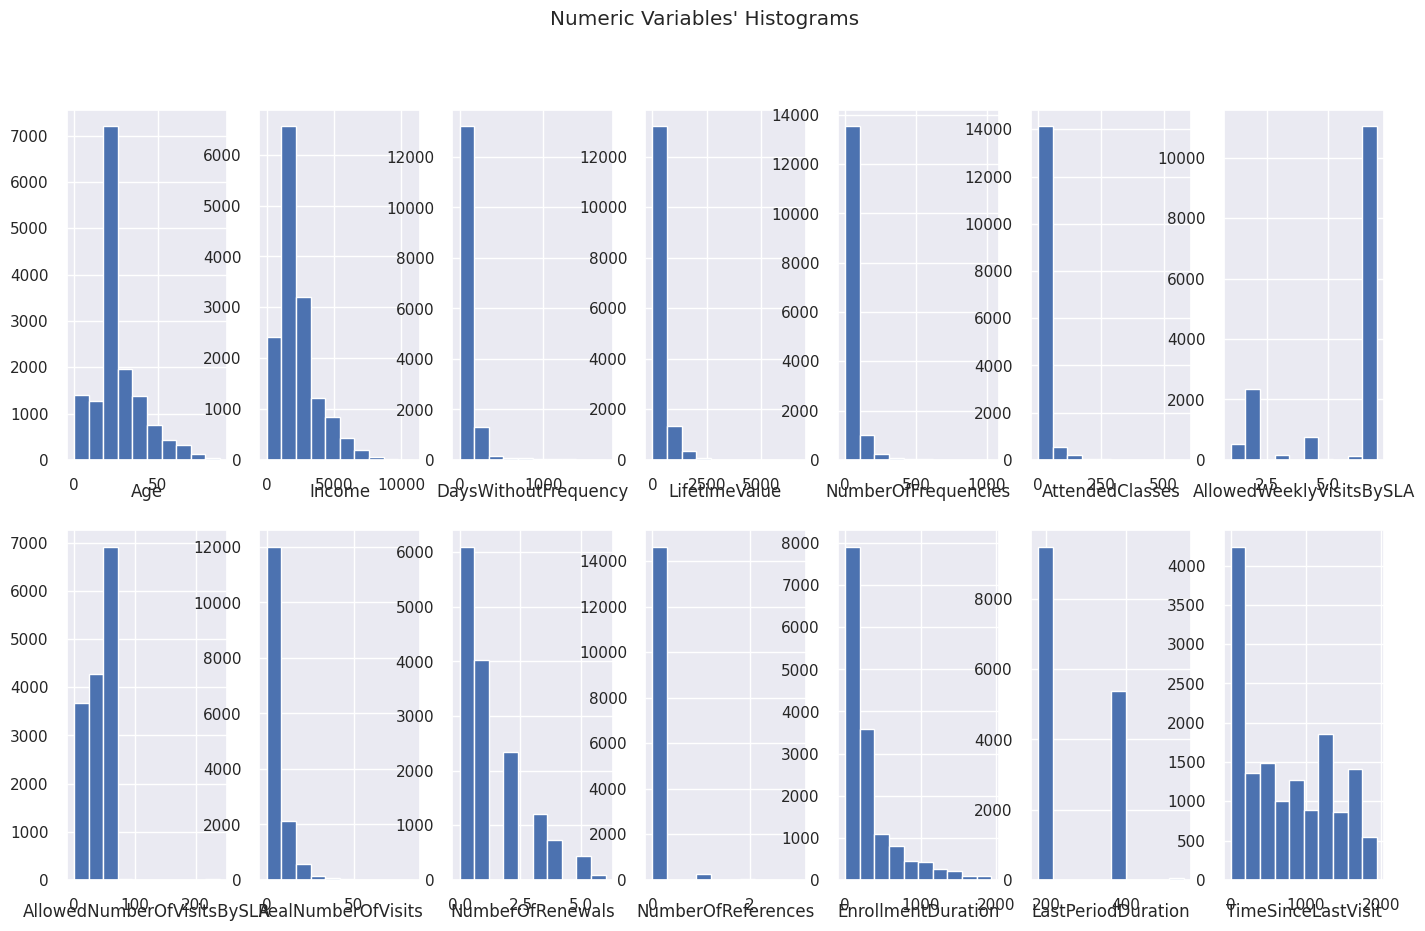

In [41]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(17, 10))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

#### Density plots (numerical vars)

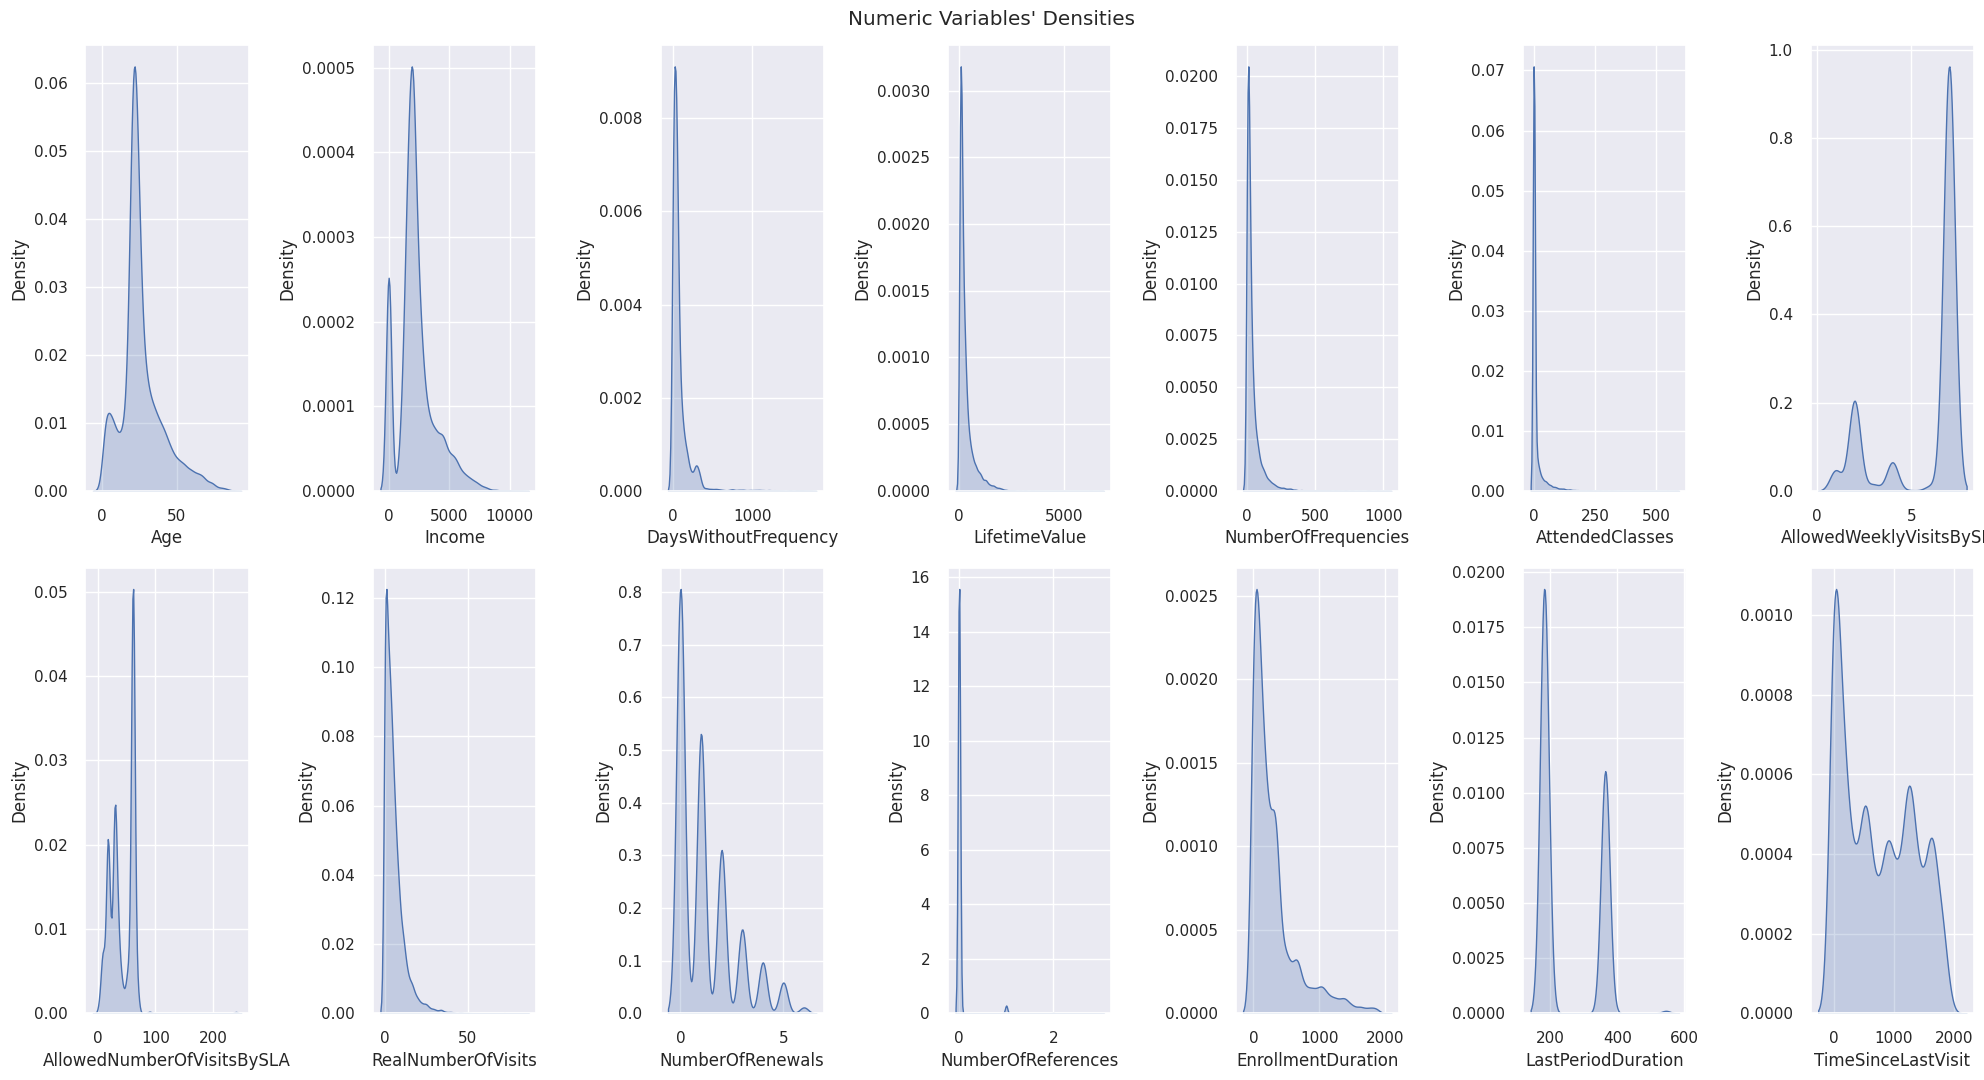

In [42]:
# All numeric variables Density plot in one figure
sns.set()

# Create a grid of subplots
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))
#fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))

# Flatten axes array for easy iterating
axes = axes.flatten()

# Loop through the features and create density plots
for i, feature in enumerate(metric_features):
    sns.kdeplot(df[feature], ax=axes[i], fill=True)

# Turn off any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Adjust layout
# Add a centered title to the figure:
title = "Numeric Variables' Densities"
plt.suptitle(title)
plt.tight_layout()
plt.show()

#### Box plots (numerical vars, outlier analysis)

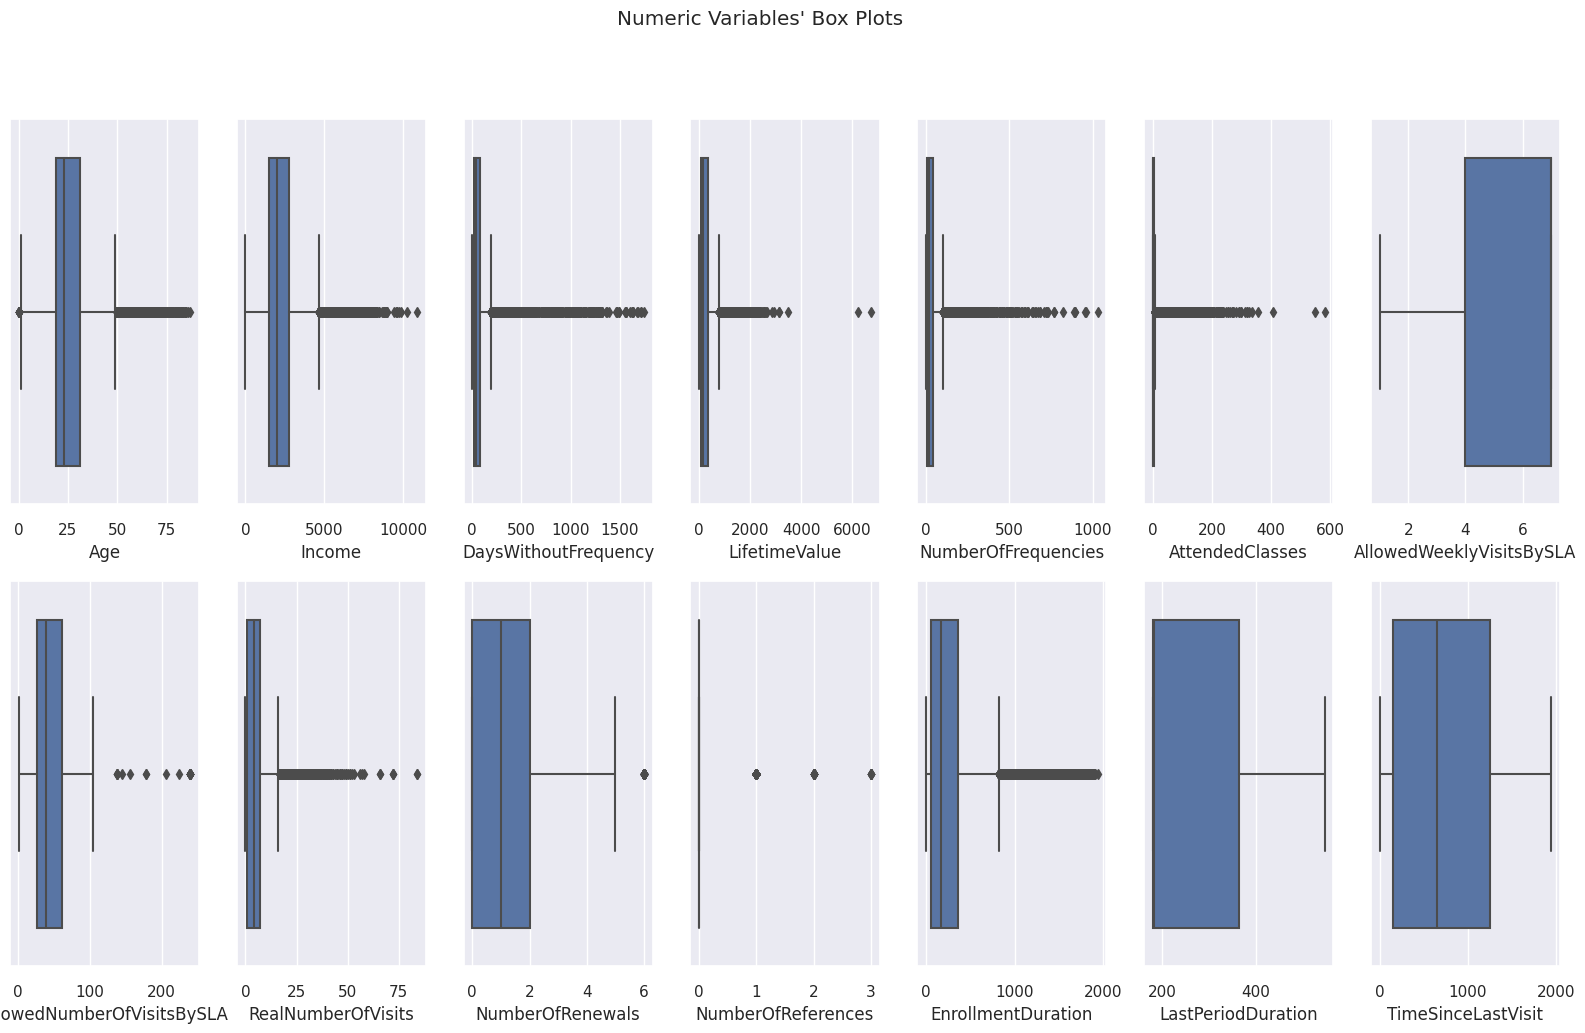

In [43]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"
plt.suptitle(title)

plt.show()


#### Bar plots (categorical vars, check proportions)

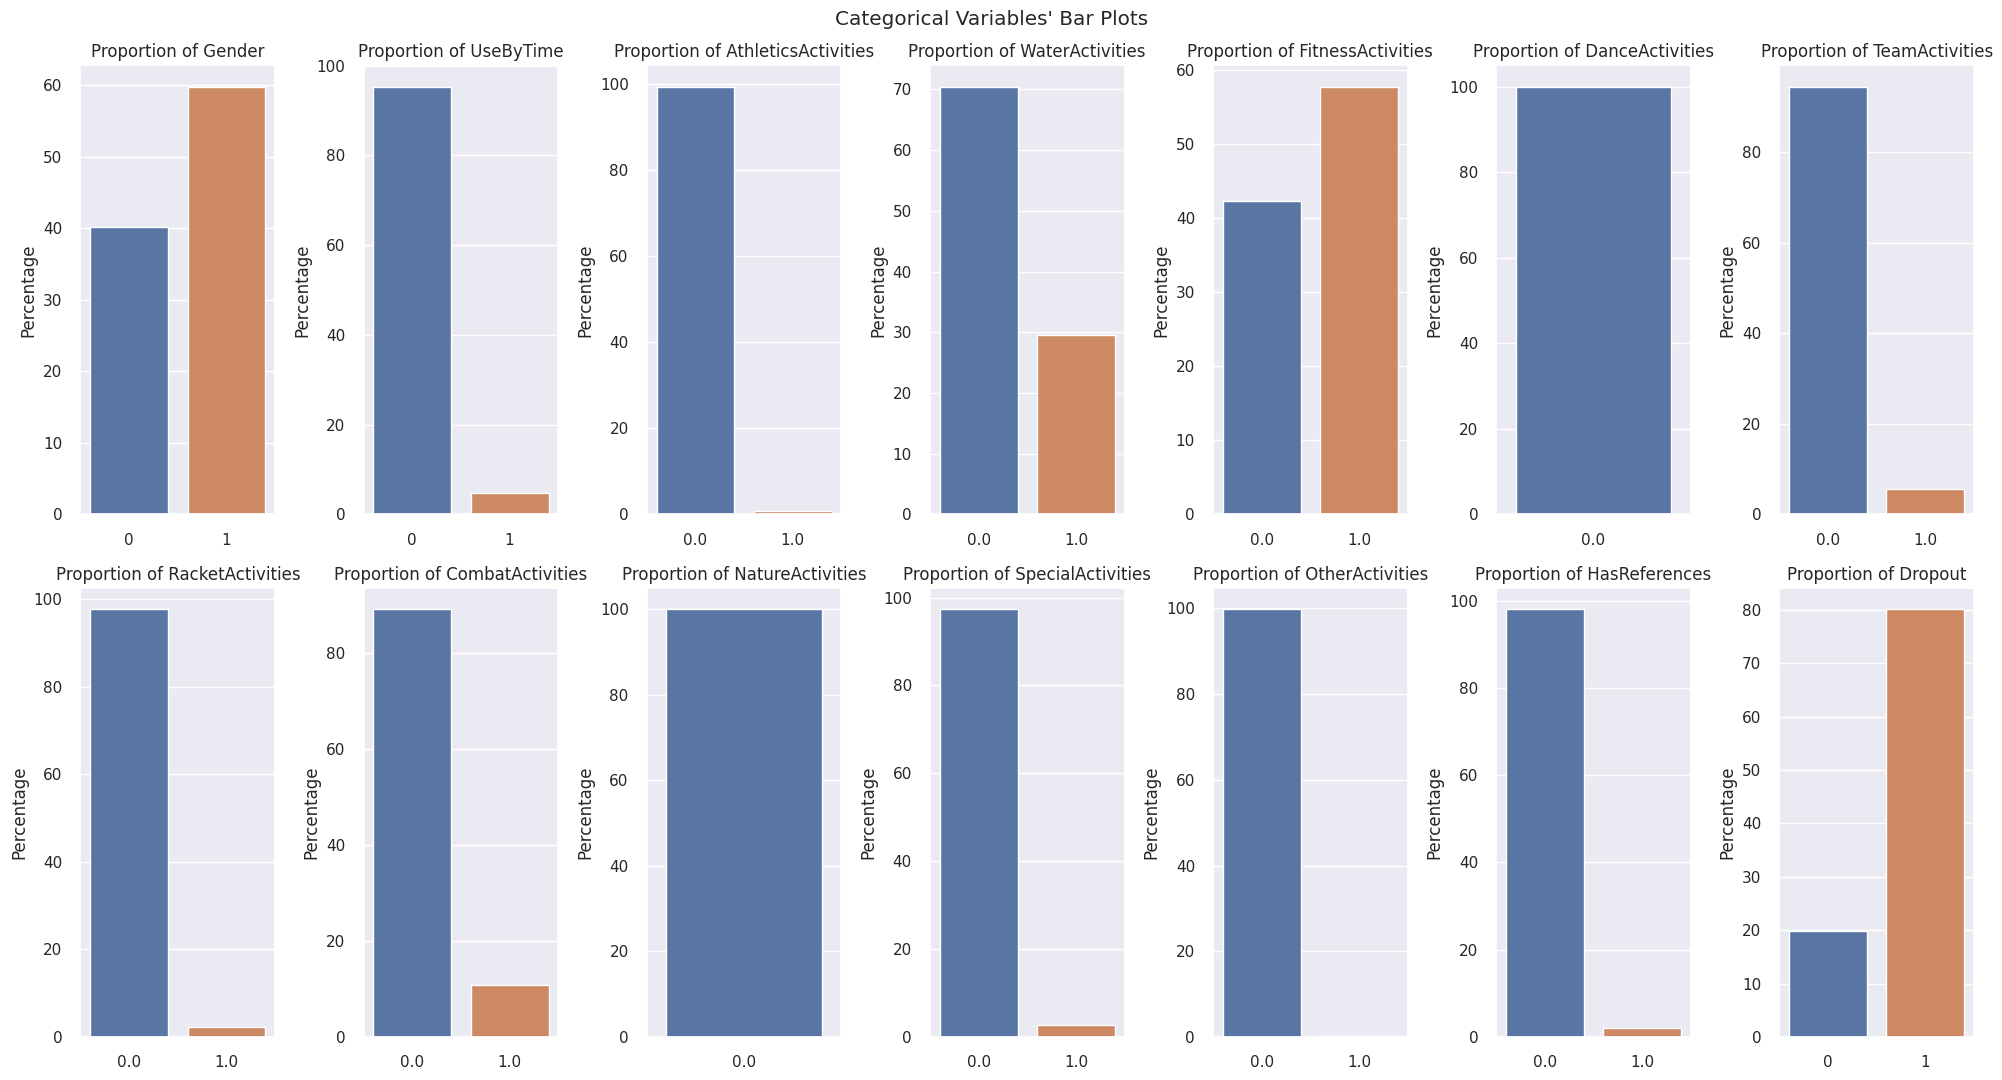

In [44]:
# All Non-Numeric Variables' Bar Plots in one figure
sns.set()

# Create a grid of subplots
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(20, 11))

# Flatten the axes array for easy iterating
axes = axes.flatten()

# Loop through the variables and create bar plots
for i, var in enumerate(non_metric_features):
    # Calculate the proportions
    value_counts = df[var].value_counts(normalize=True) * 100

    # Create a bar plot
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i])
    axes[i].set_title(f'Proportion of {var}')
    axes[i].set_ylabel('Percentage')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
# Add a centered title to the figure:
title = "Categorical Variables' Bar Plots"
plt.suptitle(title)
plt.tight_layout()
plt.show()

#### Correlation analysis

##### **Correlogram with heatmap using Pearson method**

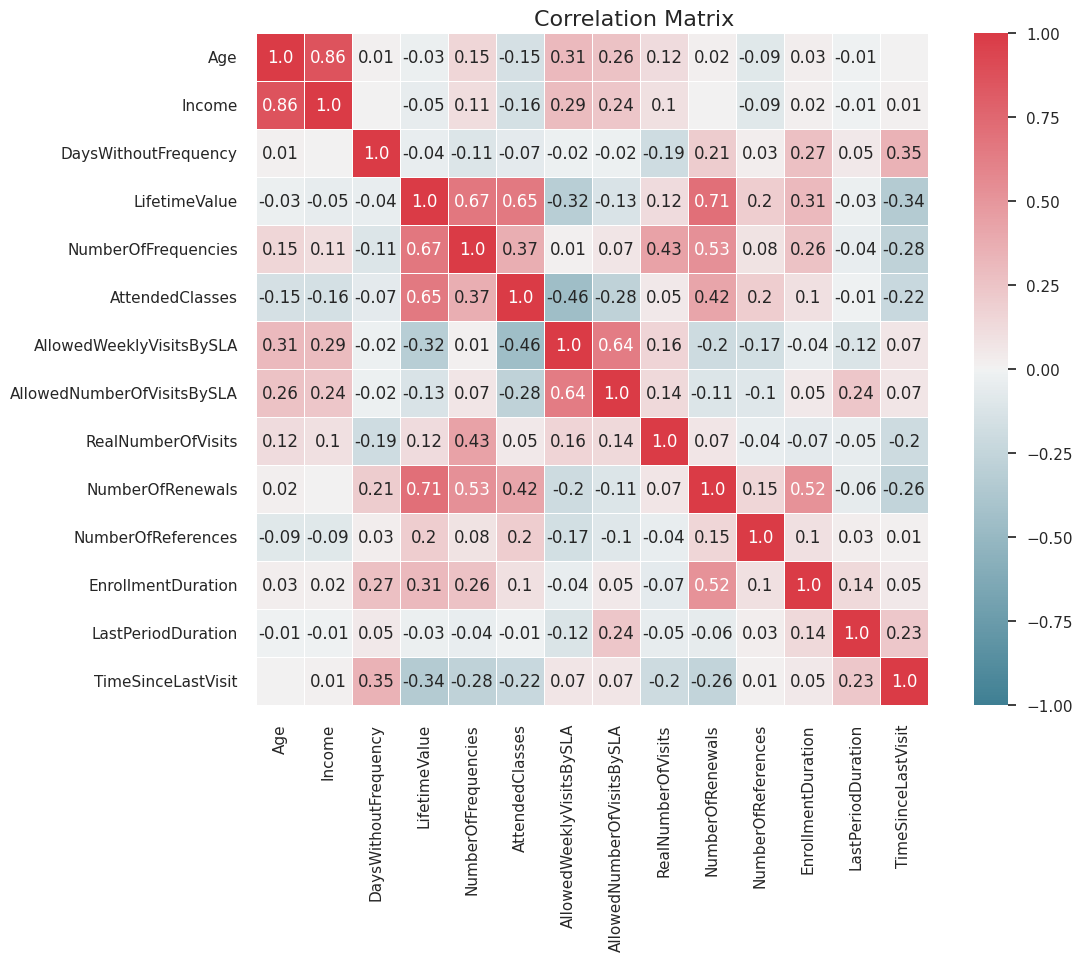

In [45]:
# Correlogram (using Pearson)
sns.set()

# Check the correlation between different features
fig = plt.figure(figsize=(12, 8))

corr = np.round(df[metric_features].corr(method="pearson"), decimals=2)

mask_annot = corr.values
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=16)

#plt.savefig(os.path.join('..', 'figures', 'correlation_matrix.png'), dpi=200)
plt.show()

##### **Correlogram with heatmap using Spearman method**

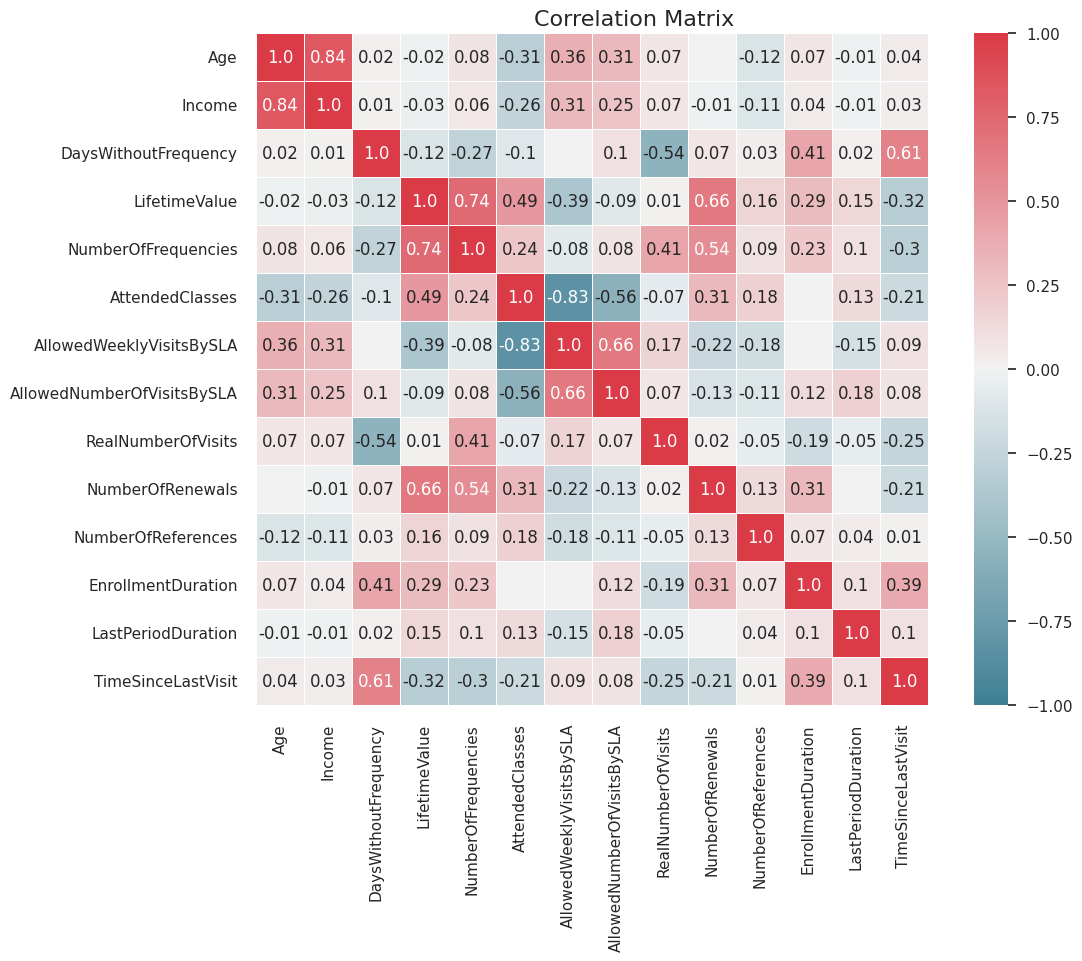

In [46]:
# Correlogram - using Spearman
sns.set()

# Check the correlation between different features
fig = plt.figure(figsize=(12, 8))

corr = np.round(df[metric_features].corr(method="spearman"), decimals=2)

mask_annot = corr.values
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=16)

#plt.savefig(os.path.join('..', 'figures', 'correlation_matrix.png'), dpi=200)
plt.show()

##### Pair plot (not used)

In [47]:
# Pair plot - not uset at this moment for the purpose of this project
# Very slow on highly dimensional dataframes, produces matrix of pair plots
# Could be used later after feature reduction

#sns.pairplot(df)
#plt.show()

#List of numeric variables you want to include in the pair plot
#numeric_vars = ['numeric_var1', 'numeric_var2', 'numeric_var3']  # Replace with your actual variable names

#List of non-numeric (categorical) variables
#categorical_vars = ['categorical_var1', 'categorical_var2']  # Replace with your actual variable names
#Create a pair plot for the numeric variables colored by each categorical variable
#for cat_var in categorical_vars:
    #sns.pairplot(df, vars=numeric_vars, hue=cat_var)
    #plt.title(f'Pair Plot Colored by {cat_var}')
    #plt.show()

##### Violin Plot (not used)

In [48]:
# Violin plot
# commented - not useful for the purpose of this project
#
## Create violin plots
#for cat_var in non_metric_features:
#    fig, axes = plt.subplots(len(metric_features), 1, figsize=(8, 5 * len(metric_features)))
#
#    for i, num_var in enumerate(metric_features):
#        sns.violinplot(x=cat_var, y=num_var, data=df, ax=axes[i])
#        axes[i].set_title(f'Violin Plot of {num_var} by {cat_var}')
#
#    plt.tight_layout()
#    plt.show()

##### **Using ProfileReport**

This is a one-call routine with a complete library implementation that does several of the steps related to E.D.A. step, some already performed earlier in this notebook.

In [49]:
# Create a ProfileReport and generate the report in the notebook
# We had issues with library dependency using it in our environment
#profile = ProfileReport(df)
#profile.to_notebook_iframe()

##### **Using lineplot between the most correlated features**

We will use lineplot to see the curve between Age and Income. This will help to guide us for the outlier removal.

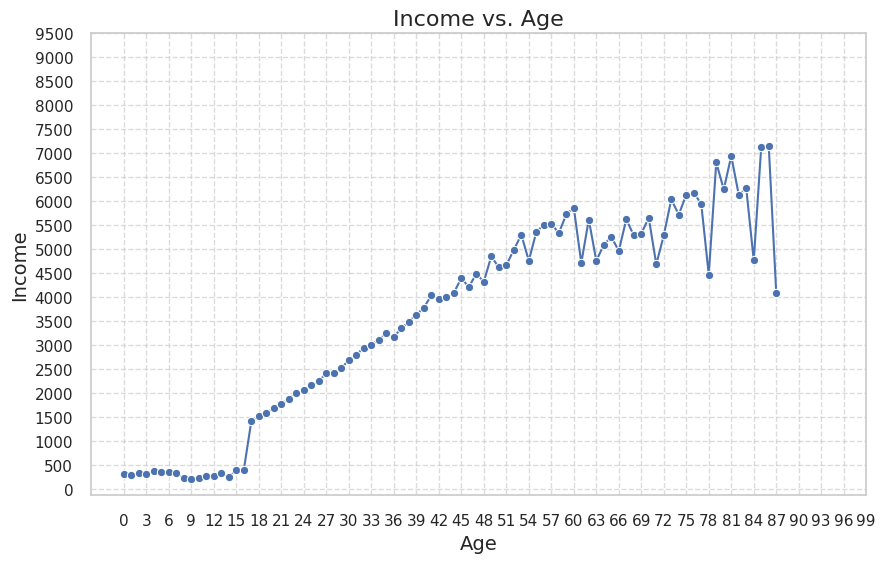

In [50]:
# Create your line plot
sns.set_style("whitegrid")  # Set seaborn style to include grid lines
plt.figure(figsize=(10, 6))  # Adjust the figure size

# Create the line plot
plot = sns.lineplot(data=df, x="Age", y="Income", marker="o", linestyle="-", markersize=6, color="b", err_style=None)

# Customize x and y-axis
plot.set_xlabel("Age", fontsize=14)  # X-axis label and fontsize
plot.set_ylabel("Income", fontsize=14)  # Y-axis label and fontsize

# Customize the grid
plot.grid(True, linestyle="--", alpha=0.7)  # Add a dotted grid with reduced opacity

# Adjust tick labels (fine-grain the axis)
plot.set_xticks(range(0, 101, 3))  # Set x-axis ticks at 10-unit intervals
plot.set_yticks(range(0, 10000, 500))  # Set y-axis ticks at 20,000-unit intervals

# Add a title
plt.title("Income vs. Age", fontsize=16)

# Show the plot
plt.show()

Note:
- We can infer that **most of the sub-16 year old customers receive some sort of monthly allowance and do not work or have a real income, earning below 500 USD**. We also got **suggestions for the high limits for Income and Age**.
- Besides that, about **these same low ages**, we got a significant number of children that may be some sort of data input error, as **kids of very early age are seldom customers of a fitness facility**, with rare exceptions such as some parental-joined classes related to WaterActivities and other family activities.

### Outlier removal simulation using IQR limits

We gave up on using this method due the removal of too much data, **retaining only around 53% of the original rows**.

In [51]:
df_iqr = df.copy() # df_central
#IQR inter quartile range to remove outliers
q25 = df_iqr.quantile(.25)
q75 = df_iqr.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters = []

for feat in metric_features:
    llim = lower_lim[feat]
    ulim = upper_lim[feat]
    filters.append(df_iqr[feat].between(llim, ulim, inclusive='both'))

# Filter the outliers
filter1 = np.all(filters, axis=0)

#Show how many data stay if removing outliers
print('Percentage of data kept after removing outliers using IQR limits:', np.round(df_iqr[filter1].shape[0]/df.shape[0] * 100, 2), "%")

Percentage of data kept after removing outliers using IQR limits: 52.9 %


### Outlier removal (manual)

Performing manual filtering for outliers following the previous data exploration hints we got.

In [52]:
filters = (
    (df['Age']<=87) & (df['Age']>=0) # cleaning 0-ages as incorrectly given
    &
    (df['Income']<=10890) # got from ProfileReport and max()
    &
    (df['DaysWithoutFrequency']<=560)
    &
    (df['LifetimeValue']<=2400)
     &
    (df['DaysWithoutFrequency']<=560)
     &
    (df['NumberOfFrequencies']<=320)
     &
    (df['AttendedClasses']<=250)
     &
    (df['AllowedWeeklyVisitsBySLA']<=100)
    &
    (df['RealNumberOfVisits']<=55)
    &
    (df['NumberOfReferences']<= 2) # number of references behaves almost as an binary feature since has too low count over 2 references

)

# filter the outliers
df_filtered = df[filters].copy()

#Show how many data stay if removing outliers
print('Percentage of data kept after removing outliers using manual inputted limits:', np.round(df_filtered.shape[0]/df.shape[0] * 100, 2), "%")

Percentage of data kept after removing outliers using manual inputted limits: 97.29 %


### Feature engineering

#### Removing correlated features following the previous hints we got during Exploratory Data Analysis (E.D.A.).

In [53]:
df_engineered = df_filtered.copy()
#df_engineered.drop(columns=["Income", "NumberOfRenewals", "NumberOfReferences", "AllowedWeeklyVisitsBySLA", "AllowedNumberOfVisitsBySLA"], inplace=True)
df_engineered.drop(columns=["NumberOfRenewals", "NumberOfReferences", "AllowedWeeklyVisitsBySLA", "AllowedNumberOfVisitsBySLA"], inplace=True)


# update metric feature list
#metric_features.remove("Income") # income is highly correlated to age and people usually are more reluctant giving a truthful info on this.
metric_features.remove("NumberOfRenewals") # number of renewals is highly correlated with LifetimeValue.
metric_features.remove("NumberOfReferences") # too low count, almost binary between having or not references, can be dropped.
metric_features.remove("AllowedWeeklyVisitsBySLA") # contractual setting to rule customer usage, not relevant
metric_features.remove("AllowedNumberOfVisitsBySLA") # contractual setting to rule customer usage, not relevant


Notes on feature removal:
- **General:**
 - **Income:** it was about to be removed due high correlation with **Age** (0.84), being the last more trustable. But we are retaining it to check if aids the clustering.
 - **NumberOfRenewals:** was removed due being **highly correlated** with **LifetimeValue** (0.71) and also because their definitions are logically tied with the customer loyalty within the business, following the same vector.
 - **NumberOfReferences:** offers almost no information beyond what the feature **HasReferences** already provides. Has vary low variation on very few cases.
 - **AllowedWeeklyVisitsBySLA:** and **AllowedNumberOfVisitsBySLA** were seen as not relevant for the scope of this project since they are very specific behaviour-related feature applyable to certain types of customers.
- **Dummy (binary) features left: this features will be disregarded on the clustering that will follow, since we will refer only to the 'metric_features' list contents, so the data will be kept on the dataframe but not used. Below we make some considerations for each variable:**
 - **Gender:** we could drop this feature since it will only polarize our clustering and during E.D.A. we already made some relevant notes. In general males are the minor share of customers but more loyal to attend the premises.
 - **UseByTime:** acts as a binary indicator (True or False) indicating whether the user was enrolled in a specific form of use. This is also a very behaviour-related feature applyable to certain types of customers and we think it is out of our scope.
 - **Dropout:**: True if quitting, False if not. It is a another out of scope information for this project. The supplied data file has a **majority of dropped customers**, it is our duty to understand customer characteristics in the whole population set. We are not predicting anything.
 - **HasReferences:** True if NumberOfReferences > 0, else False. This is a very narrowed feature that gives some hint about customer behaviour and a possible marketing approach but we consider out of scope for our project.
- **Falsely apparently correlated features:** these features seem correlated by their **metadata definitions** with **RealNumberOfVisits** (Actual visits in the last period of registration) but **this not confirmed on the correlogram**. We are keeping them for now but this is subject to the weight they will have in the clustering:
 - **NumberOfFrequencies:**	Number of visits to the sports facility between EnrollmentStart and EnrollmentFinish.
 - **AttendedClasses:** Number of classes attended between EnrollmentStart and EnrollmentFinish.

#### Aggregate all activities into one feature

We will decide later if it is useful, but for the momment let´s try to use it to reduce the dimensionality of our data by this simple method.

In [54]:
# Sum all activities into one new feature on out dataframe
df_engineered['ActivityEngagement'] = df_engineered[['DanceActivities', 'OtherActivities', 'NatureActivities', 'RacketActivities', 'AthleticsActivities','WaterActivities',
                     'FitnessActivities','TeamActivities','CombatActivities','SpecialActivities']].sum(axis=1)
metric_features.append("ActivityEngagement") # update list

In [55]:
#checking the contents on the new column
df_engineered.head(10)

,ID,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,RealNumberOfVisits,HasReferences,Dropout,EnrollmentDuration,LastPeriodDuration,TimeSinceLastVisit,ActivityEngagement
0,10000,60,1,5500.0,1,89.35,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7,2,0.0,0,58,183,1,1.0
1,10001,29,1,2630.0,60,479.20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0,1,1,0.0,1,398,364,1568,1.0
2,10002,23,0,1980.0,7,37.60,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0,6,0.0,1,30,180,889,1.0
3,10003,9,0,0.0,22,155.40,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,2,3,0.0,1,160,364,283,1.0
4,10004,35,0,4320.0,210,373.20,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0,0,0.0,1,778,180,721,1.0
5,10005,24,1,2220.0,3,140.00,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0,26,0.0,1,243,365,1190,1.0
6,10006,23,0,2340.0,16,143.50,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0,3,0.0,1,1283,180,219,1.0
7,10007,23,0,1910.0,99,233.90,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,0,11,0.0,1,1589,180,191,1.0
8,10008,29,0,3220.0,69,212.60,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0,0,0.0,1,425,180,945,1.0
9,10009,14,1,0.0,74,253.50,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,6,0,0.0,1,209,364,1076,1.0


In [56]:
# let´s check the variety of data on the just created feature ActivityEngagement
ActivityEngagement_unique_counts = df_engineered['ActivityEngagement'].value_counts()
print(ActivityEngagement_unique_counts)

1.0    13301
2.0     1118
3.0       88
0.0       20
4.0        8
5.0        2
Name: ActivityEngagement, dtype: int64


The unique value count on the new feature **ActivityEngagement** still showing a highly polarized distribution between 1 and 2 activities that may compromise our clustering trials. These feature will be kept for the moment but we may try other binary reduction techniques later to better represent activity engagement.

In [57]:
metric_features

['Age',
 'Income',
 'DaysWithoutFrequency',
 'LifetimeValue',
 'NumberOfFrequencies',
 'AttendedClasses',
 'RealNumberOfVisits',
 'EnrollmentDuration',
 'LastPeriodDuration',
 'TimeSinceLastVisit',
 'ActivityEngagement']

### Data Normalization

Since we are targeting clustering methods (initially k-means) and our outliers were already cut off, we will go for **min-max** scaling.

In [58]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_engineered[metric_features]), index=df_engineered.index, columns=metric_features)
df_scaled = pd.concat([df_engineered.drop(columns=metric_features), df_scaled], axis=1)

In [59]:
df_scaled[metric_features]

,Age,Income,DaysWithoutFrequency,LifetimeValue,NumberOfFrequencies,AttendedClasses,RealNumberOfVisits,EnrollmentDuration,LastPeriodDuration,TimeSinceLastVisit,ActivityEngagement
0,0.689655,0.505051,0.001786,0.037640,0.025078,0.028340,0.037736,0.030446,0.008197,0.000514,0.2
1,0.333333,0.241506,0.107143,0.201870,0.068966,0.004049,0.018868,0.208924,0.502732,0.805755,0.2
2,0.264368,0.181818,0.012500,0.015840,0.015674,0.000000,0.113208,0.015748,0.000000,0.456835,0.2
3,0.103448,0.000000,0.039286,0.065465,0.059561,0.008097,0.056604,0.083990,0.502732,0.145427,0.2
4,0.402299,0.396694,0.375000,0.157216,0.125392,0.000000,0.000000,0.408399,0.000000,0.370504,0.2
...,...,...,...,...,...,...,...,...,...,...,...
14937,0.160920,0.000000,0.003571,0.615237,0.347962,0.388664,0.150943,0.000000,0.008197,0.001028,0.2
14938,0.448276,0.182736,0.067857,0.144852,0.175549,0.000000,0.056604,0.137008,0.002732,0.658787,0.2
14939,0.229885,0.166208,0.003571,0.018367,0.015674,0.000000,0.150943,0.015748,0.000000,0.486125,0.2
14940,0.632184,0.440771,0.005357,0.332210,0.576803,0.627530,0.132075,0.000000,0.008197,0.001542,0.2


#### Performing PCA binary reduction for all activities

Since the AcitivityEngagement feature is controversial due its polarizarization between very few values with high counts in one of them, we will perform a technique called binary PCA reduction to help summarize all special activities.

We will start from a high component count simulation do obtain a plot to aid for the best n_component parameter.

In [60]:
# List of dummy features to perform Binary PCA on
activity_features = ['DanceActivities', 'OtherActivities', 'NatureActivities', 'RacketActivities', 'AthleticsActivities','WaterActivities',
                     'FitnessActivities','TeamActivities','CombatActivities','SpecialActivities']

# Choose the number of components (e.g., 2 components)
n_components = 10

# Initialize PCA
activity_binary_pca = PCA(n_components=n_components)

# Fit the model to the selected dummy features
activity_pca_feat = activity_binary_pca.fit_transform(df_scaled[activity_features])

pd.DataFrame(
    {"Eigenvalue": activity_binary_pca.explained_variance_,
     "Difference": np.insert(np.diff(activity_binary_pca.explained_variance_), 0, 0),
     "Proportion": activity_binary_pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(activity_binary_pca.explained_variance_ratio_)},
    index=range(1, activity_binary_pca.n_components_ + 1)
)

,Eigenvalue,Difference,Proportion,Cumulative
1,3.676984e-01,0.000000e+00,5.613143e-01,0.561314
2,1.368974e-01,-2.308010e-01,2.089824e-01,0.770297
3,6.874337e-02,-6.815407e-02,1.049410e-01,0.875238
4,3.417641e-02,-3.456696e-02,5.217239e-02,0.927410
5,2.403143e-02,-1.014498e-02,3.668546e-02,0.964095
6,1.489222e-02,-9.139213e-03,2.273389e-02,0.986829
7,6.758142e-03,-8.134075e-03,1.031672e-02,0.997146
8,1.869510e-03,-4.888632e-03,2.853922e-03,1.000000
9,4.765857e-35,-1.869510e-03,7.275374e-35,1.000000
10,0.000000e+00,-4.765857e-35,0.000000e+00,1.000000


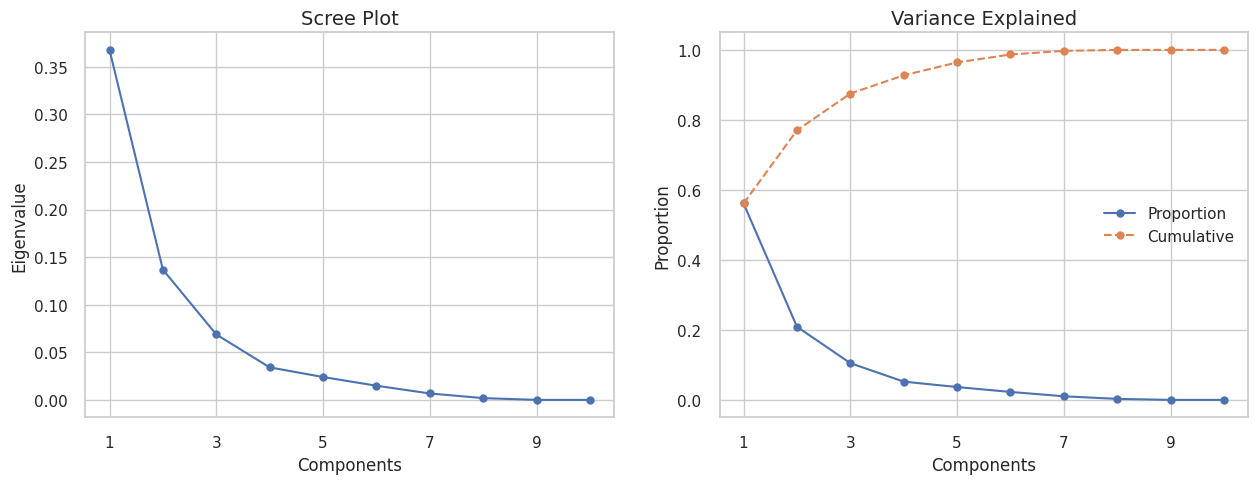

In [61]:
# Plot scree and explained variance
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(activity_binary_pca.explained_variance_, marker=".", markersize=12)
ax2.plot(activity_binary_pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(activity_binary_pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, activity_binary_pca.n_components_, 2))
ax1.set_xticklabels(range(1, activity_binary_pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, activity_binary_pca.n_components_, 2))
ax2.set_xticklabels(range(1, activity_binary_pca.n_components_ + 1, 2))

plt.show()

Notes:
- **Variance explained:** clearly shows that keeping PC=3 will explain more than 80% of the variance.
- **Scree Plot:** we notice a decreasing curve where the eigenvalues decrease rapidly at the beginning and then start to level off after PC=3, not providing anymore any significative gain on eigenvalue reduce.

In [62]:
# We will perform PCA again with the optimal number of components
n_components = 3
activity_binary_pca = PCA(n_components=n_components)
activity_pca_feat = activity_binary_pca.fit_transform(df_scaled[activity_features])
activity_pca_feat_names = [f"PCA_Activity_{i}" for i in range(activity_binary_pca.n_components_)]
activity_pca_df = pd.DataFrame(activity_pca_feat, index=df_scaled.index, columns=activity_pca_feat_names)
activity_pca_df

# Concatenate the component DataFrame with your original DataFrame
df_scaled = pd.concat([df_scaled, activity_pca_df], axis=1)

In [63]:
# Interpreting each Principal Component
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

loadings = df_scaled[activity_features + activity_pca_feat_names].corr().loc[activity_features, activity_pca_feat_names]
loadings.style.applymap(_color_red_or_green)

,PCA_Activity_0,PCA_Activity_1,PCA_Activity_2
DanceActivities,nan,nan,nan
OtherActivities,0.015190,0.032980,0.046786
NatureActivities,nan,nan,nan
RacketActivities,0.052113,0.132663,0.207886
AthleticsActivities,0.028628,0.051197,0.068511
WaterActivities,0.862394,-0.448882,-0.187930
FitnessActivities,-0.930612,-0.308646,-0.144730
TeamActivities,0.130085,0.252016,0.790135
CombatActivities,0.103012,0.841113,-0.487318
SpecialActivities,0.011738,0.051514,0.113736


Notes:
- We can see that **WaterActivites, FitnessActivities, TeamActivities and CombatActivities** play important role on overall activity engagement.
- **DanceActivities and Nature Activities** do not contribute to the PCA reduction because they have **no data variance** (there are 0s for all records - nobody on the fitness center attends these classes). The are feature with constant values. **The 'NaN' eigenvalues for features with constant values are expected and do not affect the validity of your PCA analysis.**

In [64]:
# update list
non_metric_features.remove("DanceActivities")
non_metric_features.remove("OtherActivities")
non_metric_features.remove("NatureActivities")
non_metric_features.remove("RacketActivities")
non_metric_features.remove("AthleticsActivities")
non_metric_features.remove("WaterActivities")
non_metric_features.remove("FitnessActivities")
non_metric_features.remove("TeamActivities")
non_metric_features.remove("CombatActivities")
non_metric_features.remove("SpecialActivities")

# drop dummy features from dataframe
df_scaled.drop(columns=["DanceActivities","OtherActivities","NatureActivities","RacketActivities", "AthleticsActivities", "WaterActivities", "FitnessActivities", "TeamActivities", "CombatActivities", "SpecialActivities"], inplace=True)

In [65]:
df_scaled.head(10)

,ID,Gender,UseByTime,HasReferences,Dropout,Age,Income,DaysWithoutFrequency,LifetimeValue,NumberOfFrequencies,AttendedClasses,RealNumberOfVisits,EnrollmentDuration,LastPeriodDuration,TimeSinceLastVisit,ActivityEngagement,PCA_Activity_0,PCA_Activity_1,PCA_Activity_2
0,10000,1,0,0.0,0,0.689655,0.505051,0.001786,0.037640,0.025078,0.028340,0.037736,0.030446,0.008197,0.000514,0.2,-0.519966,-0.098399,0.000916
1,10001,1,0,0.0,1,0.333333,0.241506,0.107143,0.201870,0.068966,0.004049,0.018868,0.208924,0.502732,0.805755,0.2,0.241309,0.335396,0.341068
2,10002,0,0,0.0,1,0.264368,0.181818,0.012500,0.015840,0.015674,0.000000,0.113208,0.015748,0.000000,0.456835,0.2,-0.519966,-0.098399,0.000916
3,10003,0,0,0.0,1,0.103448,0.000000,0.039286,0.065465,0.059561,0.008097,0.056604,0.083990,0.502732,0.145427,0.2,0.286964,0.468265,0.957252
4,10004,0,0,0.0,1,0.402299,0.396694,0.375000,0.157216,0.125392,0.000000,0.000000,0.408399,0.000000,0.370504,0.2,-0.519966,-0.098399,0.000916
5,10005,1,0,0.0,1,0.275862,0.203857,0.005357,0.058977,0.084639,0.000000,0.490566,0.127559,0.505464,0.611511,0.2,-0.519966,-0.098399,0.000916
6,10006,0,0,0.0,1,0.264368,0.214876,0.028571,0.060452,0.065831,0.000000,0.056604,0.673491,0.000000,0.112539,0.2,-0.519966,-0.098399,0.000916
7,10007,0,1,0.0,1,0.264368,0.175390,0.176786,0.098534,0.103448,0.000000,0.207547,0.834121,0.000000,0.098150,0.2,-0.519966,-0.098399,0.000916
8,10008,0,0,0.0,1,0.333333,0.295684,0.123214,0.089561,0.015674,0.000000,0.000000,0.223097,0.000000,0.485612,0.2,0.291001,1.018975,-0.302934
9,10009,1,0,0.0,1,0.160920,0.000000,0.132143,0.106791,0.015674,0.024291,0.000000,0.109711,0.502732,0.552929,0.2,0.286964,0.468265,0.957252


Notes:
- We still have one issue left, **our DataFrame is min-max scaled for all metric features, but we also have additional PCA columns that seem to have different scales, and they can potentially affect our clustering results with k-means**.
- K-means clustering relies on distance measures, and differences in scaling between features can impact the results. Here's how it can affect the clustering:
 - Varying Scales: if the PCA columns have different scales from the min-max scaled features, they will contribute differently to the calculation of distances between data points. Features with larger scales may dominate the clustering process, making features with smaller scales less influential.
 - Influence on Cluster Centers: The scaling of features can influence the positions of cluster centers. Features with larger scales can pull the cluster centers towards them, potentially biasing the clusters.

**So, we will re-scale the PCA columns to have the same scale as the min-max scaled features. This ensures that all features have a consistent scale, making them equally influential in the clustering process.**

Later on we may put the scaled PCA columns into the metric_features list and consider to drop ActivityEngagement.

In [66]:
scaler = MinMaxScaler()
df_scaled[['PCA_Activity_0', 'PCA_Activity_1', 'PCA_Activity_2']] = scaler.fit_transform(df_scaled[['PCA_Activity_0', 'PCA_Activity_1', 'PCA_Activity_2']])

In [67]:
df_scaled.head(10)

,ID,Gender,UseByTime,HasReferences,Dropout,Age,Income,DaysWithoutFrequency,LifetimeValue,NumberOfFrequencies,AttendedClasses,RealNumberOfVisits,EnrollmentDuration,LastPeriodDuration,TimeSinceLastVisit,ActivityEngagement,PCA_Activity_0,PCA_Activity_1,PCA_Activity_2
0,10000,1,0,0.0,0,0.689655,0.505051,0.001786,0.037640,0.025078,0.028340,0.037736,0.030446,0.008197,0.000514,0.2,0.000000e+00,0.299345,0.456475
1,10001,1,0,0.0,1,0.333333,0.241506,0.107143,0.201870,0.068966,0.004049,0.018868,0.208924,0.502732,0.805755,0.2,5.050034e-01,0.534317,0.628408
2,10002,0,0,0.0,1,0.264368,0.181818,0.012500,0.015840,0.015674,0.000000,0.113208,0.015748,0.000000,0.456835,0.2,8.881784e-16,0.299345,0.456475
3,10003,0,0,0.0,1,0.103448,0.000000,0.039286,0.065465,0.059561,0.008097,0.056604,0.083990,0.502732,0.145427,0.2,5.352889e-01,0.606287,0.939864
4,10004,0,0,0.0,1,0.402299,0.396694,0.375000,0.157216,0.125392,0.000000,0.000000,0.408399,0.000000,0.370504,0.2,7.216450e-16,0.299345,0.456475
5,10005,1,0,0.0,1,0.275862,0.203857,0.005357,0.058977,0.084639,0.000000,0.490566,0.127559,0.505464,0.611511,0.2,7.216450e-16,0.299345,0.456475
6,10006,0,0,0.0,1,0.264368,0.214876,0.028571,0.060452,0.065831,0.000000,0.056604,0.673491,0.000000,0.112539,0.2,7.216450e-16,0.299345,0.456475
7,10007,0,1,0.0,1,0.264368,0.175390,0.176786,0.098534,0.103448,0.000000,0.207547,0.834121,0.000000,0.098150,0.2,7.216450e-16,0.299345,0.456475
8,10008,0,0,0.0,1,0.333333,0.295684,0.123214,0.089561,0.015674,0.000000,0.000000,0.223097,0.000000,0.485612,0.2,5.379669e-01,0.904589,0.302891
9,10009,1,0,0.0,1,0.160920,0.000000,0.132143,0.106791,0.015674,0.024291,0.000000,0.109711,0.502732,0.552929,0.2,5.352889e-01,0.606287,0.939864


In [68]:
# just showing the dataframe still the same after outlier removal
print('Percentage of data kept after removing outliers and feature engineering:', np.round(df_scaled.shape[0] / df.shape[0], 4) * 100, "%")

Percentage of data kept after removing outliers and feature engineering: 97.28999999999999 %


In [69]:
# reverting back the filtered and scaled dataframe to the main one
df = df_scaled
df.shape

(14537, 19)

### Casting

In [70]:
# setting 'ID' as the index column on the dataframe
df.set_index("ID", inplace=True)
pd.set_option('display.max_columns', None) # show all columns
df.head(10)

,Gender,UseByTime,HasReferences,Dropout,Age,Income,DaysWithoutFrequency,LifetimeValue,NumberOfFrequencies,AttendedClasses,RealNumberOfVisits,EnrollmentDuration,LastPeriodDuration,TimeSinceLastVisit,ActivityEngagement,PCA_Activity_0,PCA_Activity_1,PCA_Activity_2
ID,,,,,,,,,,,,,,,,,,
10000,1,0,0.0,0,0.689655,0.505051,0.001786,0.037640,0.025078,0.028340,0.037736,0.030446,0.008197,0.000514,0.2,0.000000e+00,0.299345,0.456475
10001,1,0,0.0,1,0.333333,0.241506,0.107143,0.201870,0.068966,0.004049,0.018868,0.208924,0.502732,0.805755,0.2,5.050034e-01,0.534317,0.628408
10002,0,0,0.0,1,0.264368,0.181818,0.012500,0.015840,0.015674,0.000000,0.113208,0.015748,0.000000,0.456835,0.2,8.881784e-16,0.299345,0.456475
10003,0,0,0.0,1,0.103448,0.000000,0.039286,0.065465,0.059561,0.008097,0.056604,0.083990,0.502732,0.145427,0.2,5.352889e-01,0.606287,0.939864
10004,0,0,0.0,1,0.402299,0.396694,0.375000,0.157216,0.125392,0.000000,0.000000,0.408399,0.000000,0.370504,0.2,7.216450e-16,0.299345,0.456475
10005,1,0,0.0,1,0.275862,0.203857,0.005357,0.058977,0.084639,0.000000,0.490566,0.127559,0.505464,0.611511,0.2,7.216450e-16,0.299345,0.456475
10006,0,0,0.0,1,0.264368,0.214876,0.028571,0.060452,0.065831,0.000000,0.056604,0.673491,0.000000,0.112539,0.2,7.216450e-16,0.299345,0.456475
10007,0,1,0.0,1,0.264368,0.175390,0.176786,0.098534,0.103448,0.000000,0.207547,0.834121,0.000000,0.098150,0.2,7.216450e-16,0.299345,0.456475
10008,0,0,0.0,1,0.333333,0.295684,0.123214,0.089561,0.015674,0.000000,0.000000,0.223097,0.000000,0.485612,0.2,5.379669e-01,0.904589,0.302891


## Ending preprocessing

Creating two separates DF and metric_feature lists to divide ActivityEngagement and PCAs from Activities for later cluster trials.

In [71]:
# Remove 'ActivityEngagement' column
df_without_activity = df.copy() # let´s keep the original df alone
df_without_activity = df_without_activity.drop('ActivityEngagement', axis=1)

# include PCA components for Activities as new metric features
metric_features_pca = metric_features.copy()
metric_features_pca.remove('ActivityEngagement')
metric_features_pca.append('PCA_Activity_0')
metric_features_pca.append('PCA_Activity_1')
metric_features_pca.append('PCA_Activity_2')

In [72]:
df_without_activity.head(10)

,Gender,UseByTime,HasReferences,Dropout,Age,Income,DaysWithoutFrequency,LifetimeValue,NumberOfFrequencies,AttendedClasses,RealNumberOfVisits,EnrollmentDuration,LastPeriodDuration,TimeSinceLastVisit,PCA_Activity_0,PCA_Activity_1,PCA_Activity_2
ID,,,,,,,,,,,,,,,,,
10000,1,0,0.0,0,0.689655,0.505051,0.001786,0.037640,0.025078,0.028340,0.037736,0.030446,0.008197,0.000514,0.000000e+00,0.299345,0.456475
10001,1,0,0.0,1,0.333333,0.241506,0.107143,0.201870,0.068966,0.004049,0.018868,0.208924,0.502732,0.805755,5.050034e-01,0.534317,0.628408
10002,0,0,0.0,1,0.264368,0.181818,0.012500,0.015840,0.015674,0.000000,0.113208,0.015748,0.000000,0.456835,8.881784e-16,0.299345,0.456475
10003,0,0,0.0,1,0.103448,0.000000,0.039286,0.065465,0.059561,0.008097,0.056604,0.083990,0.502732,0.145427,5.352889e-01,0.606287,0.939864
10004,0,0,0.0,1,0.402299,0.396694,0.375000,0.157216,0.125392,0.000000,0.000000,0.408399,0.000000,0.370504,7.216450e-16,0.299345,0.456475
10005,1,0,0.0,1,0.275862,0.203857,0.005357,0.058977,0.084639,0.000000,0.490566,0.127559,0.505464,0.611511,7.216450e-16,0.299345,0.456475
10006,0,0,0.0,1,0.264368,0.214876,0.028571,0.060452,0.065831,0.000000,0.056604,0.673491,0.000000,0.112539,7.216450e-16,0.299345,0.456475
10007,0,1,0.0,1,0.264368,0.175390,0.176786,0.098534,0.103448,0.000000,0.207547,0.834121,0.000000,0.098150,7.216450e-16,0.299345,0.456475
10008,0,0,0.0,1,0.333333,0.295684,0.123214,0.089561,0.015674,0.000000,0.000000,0.223097,0.000000,0.485612,5.379669e-01,0.904589,0.302891


In [73]:
metric_features_pca

['Age',
 'Income',
 'DaysWithoutFrequency',
 'LifetimeValue',
 'NumberOfFrequencies',
 'AttendedClasses',
 'RealNumberOfVisits',
 'EnrollmentDuration',
 'LastPeriodDuration',
 'TimeSinceLastVisit',
 'PCA_Activity_0',
 'PCA_Activity_1',
 'PCA_Activity_2']

In [74]:
metric_features = metric_features_pca # keeping in sync

Now forward we will keep using the **df_without_activity[metric_features_pca]** dataframe as our reference data, reverting this over the original working dataframe ('df').

This has not anymore the ActivityEngagement feature but comes along with the PCA reduction of all activities. Also only holds metrics and no categorical data.

In [75]:
df_without_activity

,Gender,UseByTime,HasReferences,Dropout,Age,Income,DaysWithoutFrequency,LifetimeValue,NumberOfFrequencies,AttendedClasses,RealNumberOfVisits,EnrollmentDuration,LastPeriodDuration,TimeSinceLastVisit,PCA_Activity_0,PCA_Activity_1,PCA_Activity_2
ID,,,,,,,,,,,,,,,,,
10000,1,0,0.0,0,0.689655,0.505051,0.001786,0.037640,0.025078,0.028340,0.037736,0.030446,0.008197,0.000514,0.000000e+00,0.299345,0.456475
10001,1,0,0.0,1,0.333333,0.241506,0.107143,0.201870,0.068966,0.004049,0.018868,0.208924,0.502732,0.805755,5.050034e-01,0.534317,0.628408
10002,0,0,0.0,1,0.264368,0.181818,0.012500,0.015840,0.015674,0.000000,0.113208,0.015748,0.000000,0.456835,8.881784e-16,0.299345,0.456475
10003,0,0,0.0,1,0.103448,0.000000,0.039286,0.065465,0.059561,0.008097,0.056604,0.083990,0.502732,0.145427,5.352889e-01,0.606287,0.939864
10004,0,0,0.0,1,0.402299,0.396694,0.375000,0.157216,0.125392,0.000000,0.000000,0.408399,0.000000,0.370504,7.216450e-16,0.299345,0.456475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24937,0,0,0.0,0,0.160920,0.000000,0.003571,0.615237,0.347962,0.388664,0.150943,0.000000,0.008197,0.001028,9.327597e-01,0.223251,0.429297
24938,0,0,0.0,1,0.448276,0.182736,0.067857,0.144852,0.175549,0.000000,0.056604,0.137008,0.002732,0.658787,5.379669e-01,0.904589,0.302891
24939,0,0,0.0,1,0.229885,0.166208,0.003571,0.018367,0.015674,0.000000,0.150943,0.015748,0.000000,0.486125,7.216450e-16,0.299345,0.456475


In [76]:
# we found in later steps that Gender plays an importat role for cluster interpretability
gender_feature = ['Gender']
df = df_without_activity[gender_feature + metric_features_pca].copy()

In [77]:
df.head(10)

,Gender,Age,Income,DaysWithoutFrequency,LifetimeValue,NumberOfFrequencies,AttendedClasses,RealNumberOfVisits,EnrollmentDuration,LastPeriodDuration,TimeSinceLastVisit,PCA_Activity_0,PCA_Activity_1,PCA_Activity_2
ID,,,,,,,,,,,,,,
10000,1,0.689655,0.505051,0.001786,0.037640,0.025078,0.028340,0.037736,0.030446,0.008197,0.000514,0.000000e+00,0.299345,0.456475
10001,1,0.333333,0.241506,0.107143,0.201870,0.068966,0.004049,0.018868,0.208924,0.502732,0.805755,5.050034e-01,0.534317,0.628408
10002,0,0.264368,0.181818,0.012500,0.015840,0.015674,0.000000,0.113208,0.015748,0.000000,0.456835,8.881784e-16,0.299345,0.456475
10003,0,0.103448,0.000000,0.039286,0.065465,0.059561,0.008097,0.056604,0.083990,0.502732,0.145427,5.352889e-01,0.606287,0.939864
10004,0,0.402299,0.396694,0.375000,0.157216,0.125392,0.000000,0.000000,0.408399,0.000000,0.370504,7.216450e-16,0.299345,0.456475
10005,1,0.275862,0.203857,0.005357,0.058977,0.084639,0.000000,0.490566,0.127559,0.505464,0.611511,7.216450e-16,0.299345,0.456475
10006,0,0.264368,0.214876,0.028571,0.060452,0.065831,0.000000,0.056604,0.673491,0.000000,0.112539,7.216450e-16,0.299345,0.456475
10007,0,0.264368,0.175390,0.176786,0.098534,0.103448,0.000000,0.207547,0.834121,0.000000,0.098150,7.216450e-16,0.299345,0.456475
10008,0,0.333333,0.295684,0.123214,0.089561,0.015674,0.000000,0.000000,0.223097,0.000000,0.485612,5.379669e-01,0.904589,0.302891


## Segmentation

We decided to split the variables into only 2 perspective for simplicity. Some features will not be used in any of our segments therefore they are excluded from our clustering. While others are unrelated and will make clustering a challenge.

Objectives for the proper segmentation should pursue customer value, engagement, needs, behavior on consumption, attendance and other demographic and economic characteristics. Finally, we think that Gender plays an important role in both segments.

## Socio-Demographic Features

Feature we can use:

- Age
- Income
- Gender


## Engagement Features

Feature we can use:

- NumberOfFrequencies
- AttendedClasses
- RealNumberOfVisits
- DaysWithoutFrequencies
- TimeSinceLastVisit
- NumberOfFrequencies
- LastPeriodDuration
- LifeTimeValue

In [78]:
demographic_features = [
    'Gender',
    'Age',
    'Income',
    ]
# Gender was kept due later trials where it played important role on cluster interpretability

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14537 entries, 10000 to 24941
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                14537 non-null  int64  
 1   Age                   14537 non-null  float64
 2   Income                14537 non-null  float64
 3   DaysWithoutFrequency  14537 non-null  float64
 4   LifetimeValue         14537 non-null  float64
 5   NumberOfFrequencies   14537 non-null  float64
 6   AttendedClasses       14537 non-null  float64
 7   RealNumberOfVisits    14537 non-null  float64
 8   EnrollmentDuration    14537 non-null  float64
 9   LastPeriodDuration    14537 non-null  float64
 10  TimeSinceLastVisit    14537 non-null  float64
 11  PCA_Activity_0        14537 non-null  float64
 12  PCA_Activity_1        14537 non-null  float64
 13  PCA_Activity_2        14537 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 1.7 MB


In [80]:
df_def = df[demographic_features].copy()

In [81]:
df_def.head()

,Gender,Age,Income
ID,,,
10000,1,0.689655,0.505051
10001,1,0.333333,0.241506
10002,0,0.264368,0.181818
10003,0,0.103448,0.000000
10004,0,0.402299,0.396694


In [82]:
engagement_features = [
    'NumberOfFrequencies',
    'AttendedClasses',
    'RealNumberOfVisits',
    'DaysWithoutFrequency',
    'TimeSinceLastVisit',
    'NumberOfFrequencies',
    'LastPeriodDuration',
    'LifetimeValue',
    'EnrollmentDuration']

# keeping these for later trials
#    'PCA_Activity_0',
#    'PCA_Activity_1',
#    'PCA_Activity_2']

In [83]:
df_eaf = df[engagement_features].copy()

In [84]:
df_eaf.head()

,NumberOfFrequencies,AttendedClasses,RealNumberOfVisits,DaysWithoutFrequency,TimeSinceLastVisit,NumberOfFrequencies,LastPeriodDuration,LifetimeValue,EnrollmentDuration
ID,,,,,,,,,
10000,0.025078,0.028340,0.037736,0.001786,0.000514,0.025078,0.008197,0.037640,0.030446
10001,0.068966,0.004049,0.018868,0.107143,0.805755,0.068966,0.502732,0.201870,0.208924
10002,0.015674,0.000000,0.113208,0.012500,0.456835,0.015674,0.000000,0.015840,0.015748
10003,0.059561,0.008097,0.056604,0.039286,0.145427,0.059561,0.502732,0.065465,0.083990
10004,0.125392,0.000000,0.000000,0.375000,0.370504,0.125392,0.000000,0.157216,0.408399


# Clustering

Beforehand, we are going do define useful functions for clustering.

In [85]:
def get_sst(df):
  """
    Calculates the um of squared distances of each point to the mean of the points

  """
  return np.sum(df.var() * (df.count() - 1))


def get_r2(df, labels):
  """
    Calculates r2 given a dataframe and the clustering solution
  """
  sst = get_sst(df)
  ssw = np.sum(df.groupby(labels).apply(get_sst))
  ssb = sst - ssw
  return ssb / sst


#def get_kmeans_inertia_silhouette(df, min_clust, max_clust):
#  """
#    Returns values of inertia and silhouette for a range of number of clusters
#  """
#  inertia = []
#  silhouette = []
#  for n_clus in range(min_clust, max_clust):  # iterate over desired ncluster range
#    kmclust = KMeans(n_clusters = n_clus, init = 'k-means++', n_init = 15, random_state = 1)
#    kmclust.fit(df)
#    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution
#
#    # skip n_clus == 1 because it only makes sense to compute silhouette with at least 2 clusters
#    if n_clus == 1:
#      continue
#    labels = kmclust.predict(df)
#    silhouette.append(silhouette_score(df, labels)) # save silhouette of the given solution
#  return inertia, silhouette

def get_kmeans_inertia_silhouette(df, min_clust, max_clust):
    """
    Returns values of inertia and silhouette for a range of number of clusters
    """
    inertia = []
    silhouette = []
    for n_clus in range(min_clust, max_clust + 1):  # Iterate over desired ncluster range
        kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
        kmclust.fit(df)
        inertia.append(kmclust.inertia_)  # Save the inertia of the given cluster solution

        # Compute silhouette for n_clus >= 2
        if n_clus >= 2:
            labels = kmclust.predict(df)
            silhouette.append(silhouette_score(df, labels))  # Save silhouette of the given solution
        else:
            silhouette.append(None)  # Set silhouette to None for n_clus < 2
    return inertia, silhouette

#def get_kmeans_inertia_silhouette(df, min_clust, max_clust):
#    """
#    Returns values of inertia and silhouette for a range of numbers of clusters
#    """
#    inertia = []
#    silhouette = []
#
#    for n_clus in range(min_clust, max_clust + 1):  # Iterate over the desired ncluster range
#        kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
#        kmclust.fit(df)
#        inertia.append(kmclust.inertia_)  # Save the inertia of the given cluster solution
#
#        # Compute silhouette for clusters with at least 2 clusters
#        if n_clus >= 2:
#            labels = kmclust.predict(df)
#            silhouette.append(silhouette_score(df, labels))  # Save silhouette of the given solution
#
#    return inertia, silhouette

def plot_scores(inertia, silhouette, description, clust_range):
  f = plt.figure(figsize=(20,5))

  ax1 = f.add_subplot(121)
  ax1.plot(range(clust_range[0], clust_range[1]), inertia)
  ax1.set_ylabel("Inertia = SSw")
  ax1.set_xlabel('Nr clusters')
  ax1.set_title(f'Elbow method for {description}', fontsize = 20)

  ax2 = f.add_subplot(122)
  ax2.plot(range(clust_range[0] + 1, clust_range[1]), silhouette)
  ax2.set_ylabel("Avg silhouette")
  ax2.set_xlabel('Nr clusters')
  ax2.set_title(f'Avg silhouette for {description}', fontsize = 20)


def plot_dendogram(hclust, y_threshold, purpose):
  # Adapted from:
  # https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py
  linkage = hclust.get_params()['linkage']
  distance = hclust.get_params()['affinity']
  plt.figure(figsize = (10, 10))

  # create the counts of samples under each node
  counts = np.zeros(hclust.children_.shape[0])
  n_samples = len(hclust.labels_)

  for i, merge in enumerate(hclust.children_):
      current_count = 0
      for child_idx in merge:
          if child_idx < n_samples:
              current_count += 1  # leaf node
          else:
              # Otherwise, we are merging a previously formed cluster
              current_count += counts[child_idx - n_samples]
      counts[i] = current_count

  linkage_matrix = np.column_stack(
      [hclust.children_, hclust.distances_, counts]
  ).astype(float)

  # Plot the corresponding dendrogram
  sns.set()
  fig = plt.figure(figsize=(11,5))
  dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
  plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
  plt.title(f'HC - {linkage.title()}\'s Dendrogram for {purpose}', fontsize=21)
  plt.xlabel('Number of points in node (or index of point if no parenthesis)')
  plt.ylabel(f'{distance.title()} Distance', fontsize=13)
  plt.show()

# Socio Demographic Features

We will be working the notebook with the social demographic segment now.

### Applying K-prototype or K-modes to the Social Demographic Features

 Performs K-Prototypes or K-modes clustering for different numbers of clusters, storing the cost for each iteration in the cost list. The cost values can be later used to analyze and choose the optimal number of clusters based on the elbow method and other clustering evaluation techniques.

 **K-prototypes will be used if our segment is of mixed features (numeric/categorical), and k-modes will be used if our segment is made of purely numeric features.**

**Trough trial, we concluded that the Gender feature (binary) helps for cluster reduce and interpretability, so we decided to keep with k-prototypes** and reassign 'Gender' on the df_def (Social/Demographic).

In [86]:
cost = []

# if df_def is mixed numeric/categorical we use kprototypes
for cluster in range(2, 10):
  kprototype = KPrototypes(n_jobs = 4, n_clusters = cluster, random_state = 42)
  kprototype.fit_predict(df_def, categorical = [0] ) # gender is categorical on [0] in df_def
  cost.append(kprototype.cost_)
  print('Cluster initiation: {}'.format(cluster))

#if def_ef was purely numeric we would use kmodes
#for cluster in range(2, 10):
#    kmodes = KModes(n_clusters=cluster, init='Huang', n_init=1, verbose=0, random_state=0)
#    clusters = kmodes.fit_predict(df_def)
#    cost.append(kmodes.cost_)
#    print('Cluster initiation: {}'.format(cluster))

Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


Text(0, 0.5, 'Inertia')

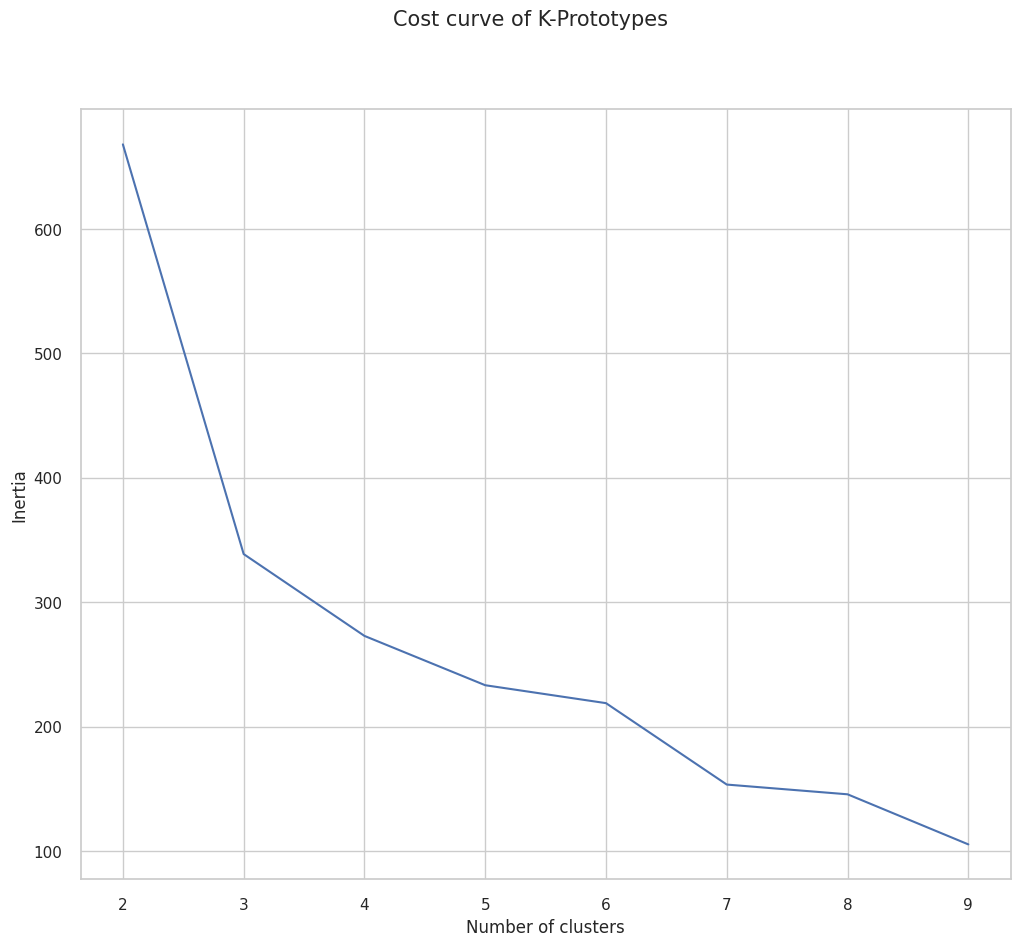

In [87]:
plt.figure(figsize = (12, 10))
plt.plot(range(2, len(cost) + 2), cost)
plt.suptitle('Cost curve of K-Prototypes', fontsize = 15)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

We will work with 5 clusters for the Social-Demographic segment.

In [88]:
kprototype = KPrototypes(n_jobs = 4, n_clusters = 5, random_state = 42)
kprototype.fit_predict(df_def, categorical = [0])

array([2, 0, 1, ..., 1, 2, 4], dtype=uint16)

In [89]:
sociodemographic_results = pd.DataFrame(columns = ['silhouette'])

In [96]:
kprototype_scores = {}
labels = kprototype.labels_
from sklearn.metrics.pairwise import euclidean_distances

def kprototype_distance(df, numerical_vars, categorical_vars):

  # euclidean distance for numerical feature
  def pairwise_distance(x1, x2):
    return np.abs(x1 - x2)

  # apply the function to the observations series to calculate the pairwise distances
  dist = df[numerical_vars].apply(lambda x: pairwise_distance(x, df[numerical_vars]))

  # pairwise hamming distance between all rows in the categorical features
  dist = dist + squareform(pdist(df[categorical_vars], 'hamming'))

  return dist

dist_matrix = kprototype_distance(df_def, 'Age', ['Income', 'Gender'])

In [97]:
kprototype_scores['k-prototypes'] = [silhouette_score(dist_matrix, labels)]
sociodemographic_results = sociodemographic_results.append(pd.DataFrame(kprototype_scores, index = ['silhouette']).T)
sociodemographic_results

,silhouette
k-prototypes,0.537005


### Applying Hierarchical clustering to the Social Demographic Features

Calculating distance Matrix using the gower distance

In [98]:
distance_matrix = gower.gower_matrix(df_def, cat_features = [True, False, False])

We are going to apply hierarchichal agglomerative clustering to decide the number of clusters that our data have. We will visualize it in a dendrogram. The linkage method that we are going to use is Ward's method, because this linkage take into account the variability of the data within a cluster and the variability when we merge clusters. Therefore, it could be a great option to choose.

<Figure size 1000x1000 with 0 Axes>

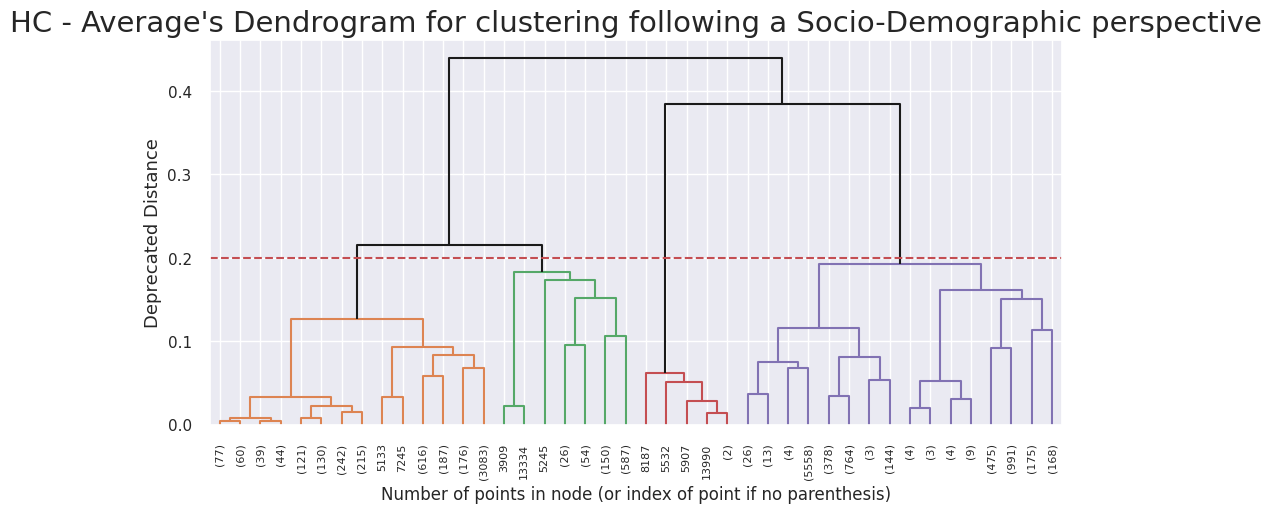

In [99]:
clst = AgglomerativeClustering(linkage='average', distance_threshold=0, n_clusters=None, metric='precomputed')
clst.fit_predict(distance_matrix)
plot_dendogram(clst, 0.2, 'clustering following a Socio-Demographic perspective')

Notes on the HC graph:
- Data points or clusters that are above the cutoff line are considered part of a single, larger cluster. In other words, if we cut the dendrogram at this level, we would have a smaller number of larger clusters.
- The specific height value where we draw the cutoff line determines the granularity of our clusters. Higher cutoff values lead to fewer, larger clusters, while lower cutoff values create more, smaller clusters.
- Typically, the choice of the cutoff height depends on our specific problem and the level of granularity you need in your clustering solution. We might set the cutoff line at a height that corresponds to a natural separation in our data or based on domain knowledge.

In [100]:
hc_scores = {}
clst = AgglomerativeClustering(linkage='average', n_clusters=5, affinity='precomputed')
labels = clst.fit_predict(distance_matrix)
hc_scores['hc'] = [silhouette_score(distance_matrix, labels)]
sociodemographic_results = sociodemographic_results.append(pd.DataFrame(hc_scores, index = ['silhouette']).T)

### Applying K-Medoids Clustering Algorithm to the Social Demographic Features

In [101]:
inertia = []

for n_clus in range(1, 11):
    km = kmedoids.KMedoids(n_clus, method='fasterpam', random_state=42).fit(distance_matrix)
    inertia.append(km.inertia_)

In [102]:
kmedoids_scores = {}

km = kmedoids.KMedoids(5, method='fasterpam').fit(distance_matrix)
labels = km.labels_
kmedoids_scores['k-medoids'] = [silhouette_score(distance_matrix, labels)]
sociodemographic_results = sociodemographic_results.append(pd.DataFrame(kmedoids_scores, index = ['silhouette']).T)

In [105]:
### Score comparison for k-prototypes, hc and k-medoids over df_def (Social-Demographic perspective)
sociodemographic_results

,silhouette
k-prototypes,0.537005
hc,0.602889
k-medoids,0.614813


**So we are going forward with a n=5 cluster number for the Social/Demographics dataframe (df_def) with a guidance to use the method for best clustering with kmedoids.** Let´s assing the labels to the dataframe.

In [106]:
cluster_labels = labels

# Add the cluster labels to your original DataFrame (df_def)
df_def['Cluster_Label'] = cluster_labels
df_def.head(10)

,Gender,Age,Income,Cluster_Label
ID,,,,
10000,1,0.689655,0.505051,0
10001,1,0.333333,0.241506,4
10002,0,0.264368,0.181818,2
10003,0,0.103448,0.000000,2
10004,0,0.402299,0.396694,1
10005,1,0.275862,0.203857,4
10006,0,0.264368,0.214876,2
10007,0,0.264368,0.175390,2
10008,0,0.333333,0.295684,2


# Engagement Features

### Applying K-Means to the Engagement Features

Since df_eaf (our Engagement feature dataframe) is purely numerical, we will use **k-means**. K-means is a popular clustering algorithm used for partitioning data into distinct groups based on similarities. It aims to minimize the variance within clusters by iteratively assigning data points to the nearest cluster center and updating those centers. K-means requires specifying the number of clusters (K) in advance and is sensitive to the initial placement of cluster centers, often requiring multiple runs with different initializations.

 ### Showing elbow method and Silhouette score

- The **Elbow method** is a technique used to determine the optimal number of clusters (K) in K-means clustering. It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters.
 - As K increases, the WCSS typically decreases, indicating improved clustering. The "elbow point" in the plot represents a trade-off between model complexity and clustering quality. It is where the rate of decrease in WCSS slows down, suggesting the ideal K value for the number of clusters.
 - Selecting K at the elbow point helps balance the model's interpretability and effectiveness in capturing cluster structure.

- **Silhouette score:** we compute the Silhouette score for different cluster numbers. The silhouette score measures how similar an object is to its own cluster compared to other clusters. We will aim for a higher silhouette score, which indicates better-defined clusters. This forms a basis for the next clustering algorithm we will attempt


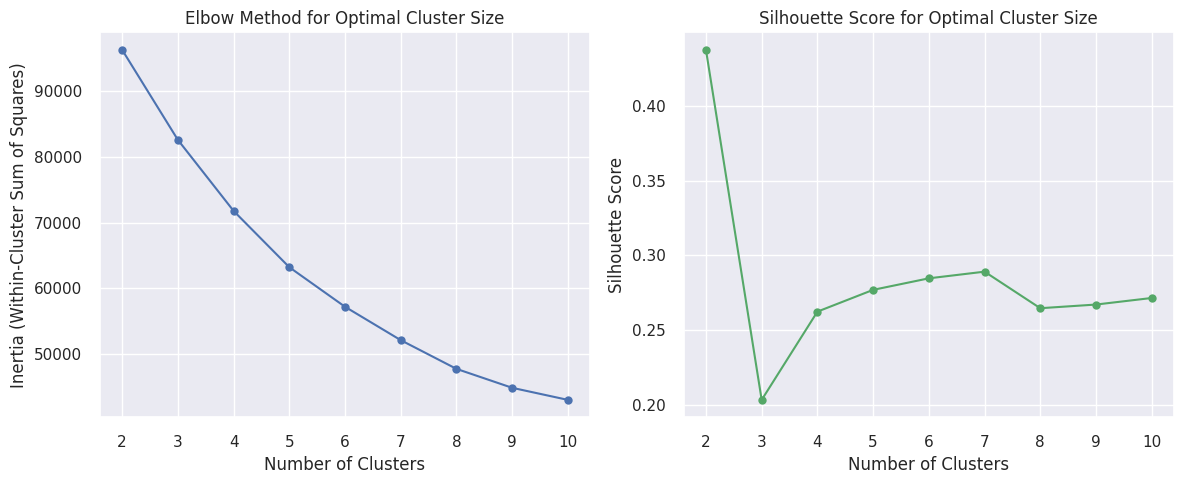

Silhouette Scores:
For n_clusters = 2, Silhouette Score = 0.44
For n_clusters = 3, Silhouette Score = 0.20
For n_clusters = 4, Silhouette Score = 0.26
For n_clusters = 5, Silhouette Score = 0.28
For n_clusters = 6, Silhouette Score = 0.28
For n_clusters = 7, Silhouette Score = 0.29
For n_clusters = 8, Silhouette Score = 0.26
For n_clusters = 9, Silhouette Score = 0.27
For n_clusters = 10, Silhouette Score = 0.27


In [109]:
# Initialize an empty list to store inertia values for different cluster sizes
inertia_values = []

# Initialize an empty list to store silhouette scores for different cluster sizes
silhouette_scores = []

# Specify the range of cluster sizes you want to test
cluster_range = range(2, 11)  # You can adjust this range as needed

# Standardize the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_eaf)

# Iterate over different cluster sizes
for n_clusters in cluster_range:
    # Fit K-Means clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(scaled_data)

    # Append the inertia value (within-cluster sum of squares) to the list
    inertia_values.append(kmeans.inertia_)

    # Calculate silhouette score and append to the list
    if n_clusters > 1:
        silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(None)  # Silhouette score is undefined for n_clusters=1

# Plot the Elbow Method graph
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Cluster Size')

# Plot the Silhouette Score graph
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='g')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Cluster Size')

plt.tight_layout()
plt.show()

# Print the silhouette scores
print("Silhouette Scores:")
for n_clusters, silhouette_score in zip(cluster_range, silhouette_scores):
    print(f"For n_clusters = {n_clusters}, Silhouette Score = {silhouette_score:.2f}")

**Suggested cluster number is 2 for Engagement features due the higher silhouette score. Elbow plot has a no clear change, showing a soft descent curve.**

We probably would need to do several trials matching differently all the features contained in the df_eaf dataframe to get a clear cluster suggestion as well **reassessing the correlations in between these features**. Let´s assign the labels to the dataframe.

In [110]:
# Choose the desired number of clusters (e.g., 5)
n_clusters = 2

# Fit K-Means clustering model with the selected number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(scaled_data)

# Add the cluster labels to your original DataFrame (df_eaf) as 'Cluster_Label'
df_eaf['Cluster_Label'] = kmeans.labels_

df_eaf.head(10)

,NumberOfFrequencies,AttendedClasses,RealNumberOfVisits,DaysWithoutFrequency,TimeSinceLastVisit,NumberOfFrequencies,LastPeriodDuration,LifetimeValue,EnrollmentDuration,Cluster_Label
ID,,,,,,,,,,
10000,0.025078,0.028340,0.037736,0.001786,0.000514,0.025078,0.008197,0.037640,0.030446,0
10001,0.068966,0.004049,0.018868,0.107143,0.805755,0.068966,0.502732,0.201870,0.208924,0
10002,0.015674,0.000000,0.113208,0.012500,0.456835,0.015674,0.000000,0.015840,0.015748,0
10003,0.059561,0.008097,0.056604,0.039286,0.145427,0.059561,0.502732,0.065465,0.083990,0
10004,0.125392,0.000000,0.000000,0.375000,0.370504,0.125392,0.000000,0.157216,0.408399,0
10005,0.084639,0.000000,0.490566,0.005357,0.611511,0.084639,0.505464,0.058977,0.127559,0
10006,0.065831,0.000000,0.056604,0.028571,0.112539,0.065831,0.000000,0.060452,0.673491,0
10007,0.103448,0.000000,0.207547,0.176786,0.098150,0.103448,0.000000,0.098534,0.834121,0
10008,0.015674,0.000000,0.000000,0.123214,0.485612,0.015674,0.000000,0.089561,0.223097,0


### K-means, PCA reduction & Plotting

Principal Component Analysis (PCA) is a dimensionality reduction technique used to reduce the number of features while preserving the most important information in the data.

- In K-means clustering, PCA reduction can be applied to visualize high-dimensional data in a lower-dimensional space (e.g., 2D or 3D) to aid in cluster interpretation.

- After PCA, we can plot the data points in the reduced space and use K-means to cluster them, allowing for easier visualization and analysis of clusters.

- We will perform the plot below **only for the Engagement segment**, since it is purely made from numeric variables and thus will not be affected from polarization.

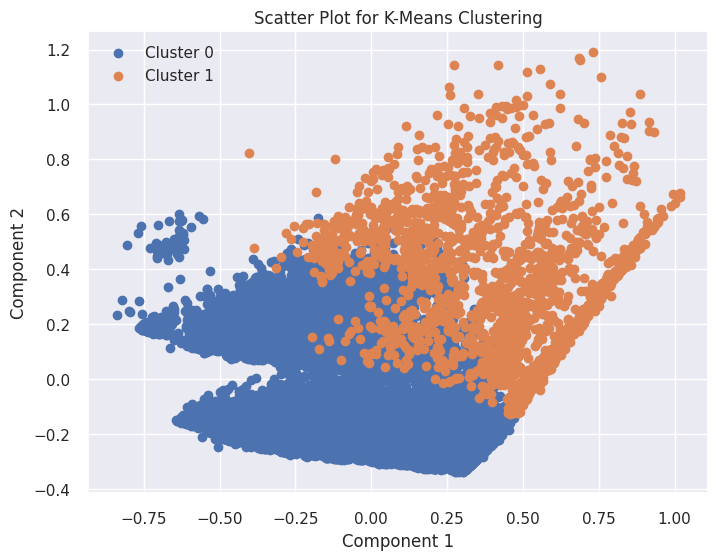

In [111]:
pca = PCA(n_components=2)
df_eaf_without_labels = df_eaf.drop('Cluster_Label', axis=1)
pca_result = pca.fit_transform(df_eaf_without_labels)  # all metric features wihtout the cluster label itself
pca_df = pd.DataFrame()
pca_df['Component 1'] = pca_result[:, 0]
pca_df['Component 2'] = pca_result[:, 1]

# Reset indices of both DataFrames
df_eaf.reset_index(drop=True, inplace=True)
pca_df.reset_index(drop=True, inplace=True)

# Finally, do the plotting
# Scatter plot for each cluster
plt.figure(figsize=(8, 6))
for cluster_id in range(n_clusters): # obtained above
    cluster_points = pca_df[df_eaf['Cluster_Label'] == cluster_id]
    plt.scatter(cluster_points['Component 1'], cluster_points['Component 2'], label=f'Cluster {cluster_id}')

# Add labels and legend
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Scatter Plot for K-Means Clustering')
plt.legend()
plt.show()

# Profiling



In [112]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels.
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)

    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)

        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]

        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy')
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)

    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [113]:
metric_features

['Age',
 'Income',
 'DaysWithoutFrequency',
 'LifetimeValue',
 'NumberOfFrequencies',
 'AttendedClasses',
 'RealNumberOfVisits',
 'EnrollmentDuration',
 'LastPeriodDuration',
 'TimeSinceLastVisit',
 'PCA_Activity_0',
 'PCA_Activity_1',
 'PCA_Activity_2']

In [114]:
demographic_labels = ['Gender', 'Age', 'Income', 'Cluster_Label']
engagement_labels = ['AttendedClasses',	'RealNumberOfVisits',	'DaysWithoutFrequency',	'TimeSinceLastVisit', 'NumberOfFrequencies', 'LastPeriodDuration', 'LifetimeValue',	'EnrollmentDuration']


In [118]:
# Applying the right clustering (algorithm and number of clusters) for each perspective
demographic_labels = km.labels_ # we already have the labels from previous k-medoid execution
engagement_labels = kmeans.labels_ # also from previous kmeans execution

df['demographic_labels'] = demographic_labels
df['engagement_labels'] = engagement_labels

In [120]:
# Count label frequencies (contigency table)

pd.crosstab(df['demographic_labels'],
            df['engagement_labels'])



engagement_labels,0,1
demographic_labels,,
0,1508,333
1,959,309
2,3799,745
3,784,360
4,5300,440


Notes:
- We need to check if we will run into issued being K too large (k = 15). We need to reduce the K to improve our business understanding. If we have few concentration on some clusters we shall merge them.**
- Cluster concentration seems good we will move forward.

In [121]:
# Centroids of the concatenated cluster labels
df_centroids = df.groupby(['demographic_labels', 'engagement_labels'])\
    [metric_features].mean()
df_centroids

Age    Income  \
demographic_labels engagement_labels                       
0                  0                  0.541221  0.412750   
                   1                  0.577716  0.423410   
1                  0                  0.517937  0.392212   
                   1                  0.566789  0.422376   
2                  0                  0.231885  0.148521   
                   1                  0.195464  0.113097   
3                  0                  0.088215  0.000117   
                   1                  0.092880  0.000000   
4                  0                  0.263836  0.179357   
                   1                  0.263454  0.186852   

                                      DaysWithoutFrequency  LifetimeValue  \
demographic_labels engagement_labels                                        
0                  0                              0.136935       0.088123   
                   1                              0.075751       0.339126   
1                  0                              0.119848       0.092256   
                   1                              0.067614       0.356066   
2                  0                              0.126650       0.081572   
                   1                              0.067078       0.363376   
3                  0                              0.120201       0.130764   
                   1                              0.066543       0.499146   
4                  0                              0.133217       0.060841   
                   1                              0.066899       0.305266   

                                      NumberOfFrequencies  AttendedClasses  \
demographic_labels engagement_labels                                         
0                  0                             0.061118         0.015002   
                   1                             0.424751         0.143597   
1                  0                             0.071800         0.012551   
                   1                             0.459030         0.094061   
2                  0                             0.063379         0.015881   
                   1                             0.368248         0.185306   
3                  0                             0.049125         0.052477   
                   1                             0.302577         0.339755   
4                  0                             0.056513         0.008043   
                   1                             0.412988         0.123574   

                                      RealNumberOfVisits  EnrollmentDuration  \
demographic_labels engagement_labels                                           
0                  0                            0.077524            0.125228   
                   1                            0.178990            0.281340   
1                  0                            0.100399            0.130268   
                   1                            0.206143            0.276471   
2                  0                            0.087158            0.131167   
                   1                            0.160314            0.274282   
3                  0                            0.055160            0.120417   
                   1                            0.104088            0.208177   
4                  0                            0.089680            0.122881   
                   1                            0.172727            0.339214   

                                      LastPeriodDuration  TimeSinceLastVisit  \
demographic_labels engagement_labels                                           
0                  0                            0.192009            0.398796   
                   1                            0.155516            0.145533   
1                  0                            0.205984            0.370522   
                   1                            0.115859            0.104446   
2                  

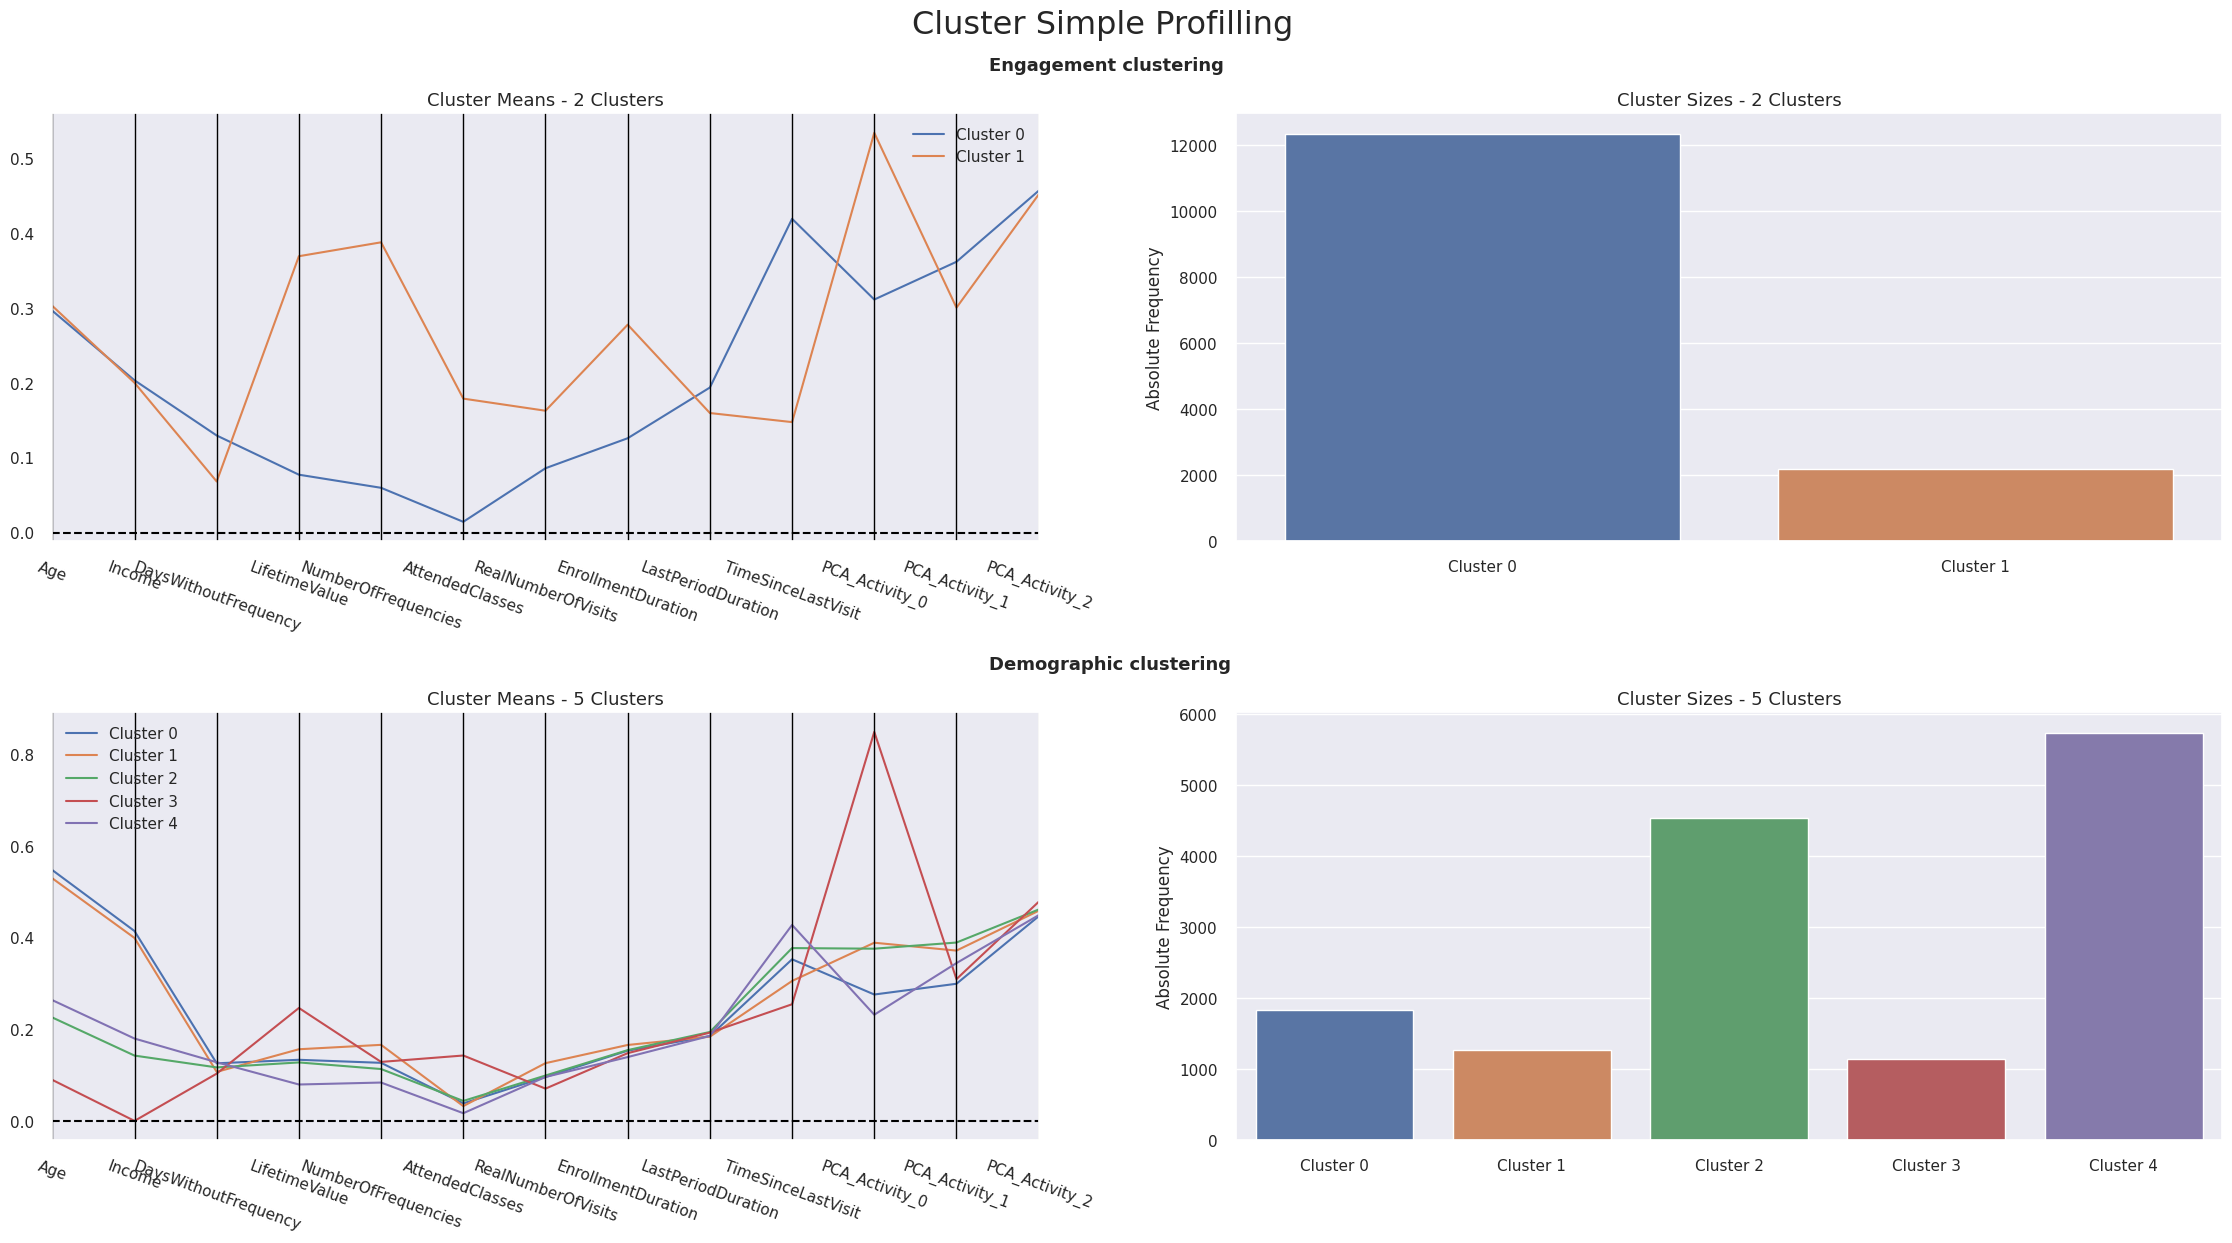

In [122]:
# Assuming metric_features contains the names of columns you want from df
selected_columns = df[metric_features + ['engagement_labels', 'demographic_labels']]

# Assuming cluster_profiles accepts a DataFrame for df
cluster_profiles(
    df=selected_columns,
    label_columns=['engagement_labels', 'demographic_labels'],
    figsize=(28, 13),
    compar_titles=["Engagement clustering", "Demographic clustering"]
)

**Important Notes**:
- About the **Engagement** perspective:
 - We can see clearly that engagement clustering does a good job indirectly dividind the male and female population as seen before on the descriptive statistics review.
 - Through this engagement clustering profile, we can distinctly see that one population does no attend so frequently the fitness center premises while the other group is very loyal and health-conscious.
 - Income and Age perform as similar because these are no distinct features for both genders.
 - **This clearly indicates different marketing approaches for the male/female population because as previously analyzed, the male population is a minority in the customer base.**
- About the **Demographics** perspective:
 - With the given 5 clusters, we do not see a clear distinction that could be related to genders indirectly but we may check out that some of the special activities that weigh more into the **PCA activity 0** (**FitnessActivities and WaterActivities** do diverge the clusters a lot, showing that this
 - Also, about **Income and Age** we see clearly **Cluster 1** with lower valuation, which points to a very specific customer segment that matches our **younger and low-income** population that relies on parental allowances and such. This population should be taken care with special offerings to reduce dropout.
  - We also notice considerable cluster differences on the **attendance features** such as **TimeSinceLastVisit and DaysWithoutFrequency**, which denote first the behaviour our customer base (based mostly tied to gender) and also since our dataframe has a high number of records from customers that already dropped out.
  - **These same clusters (0 and 3) point to very critical features that match with very low values for RealNumberOfVisits and AttendedClasses** showing the clear need to engage customer base with promotions to not just enroll but to participate in the fitness center routine.

### Cluster visualization (t-SNE & DT)



#### Social/Demographic

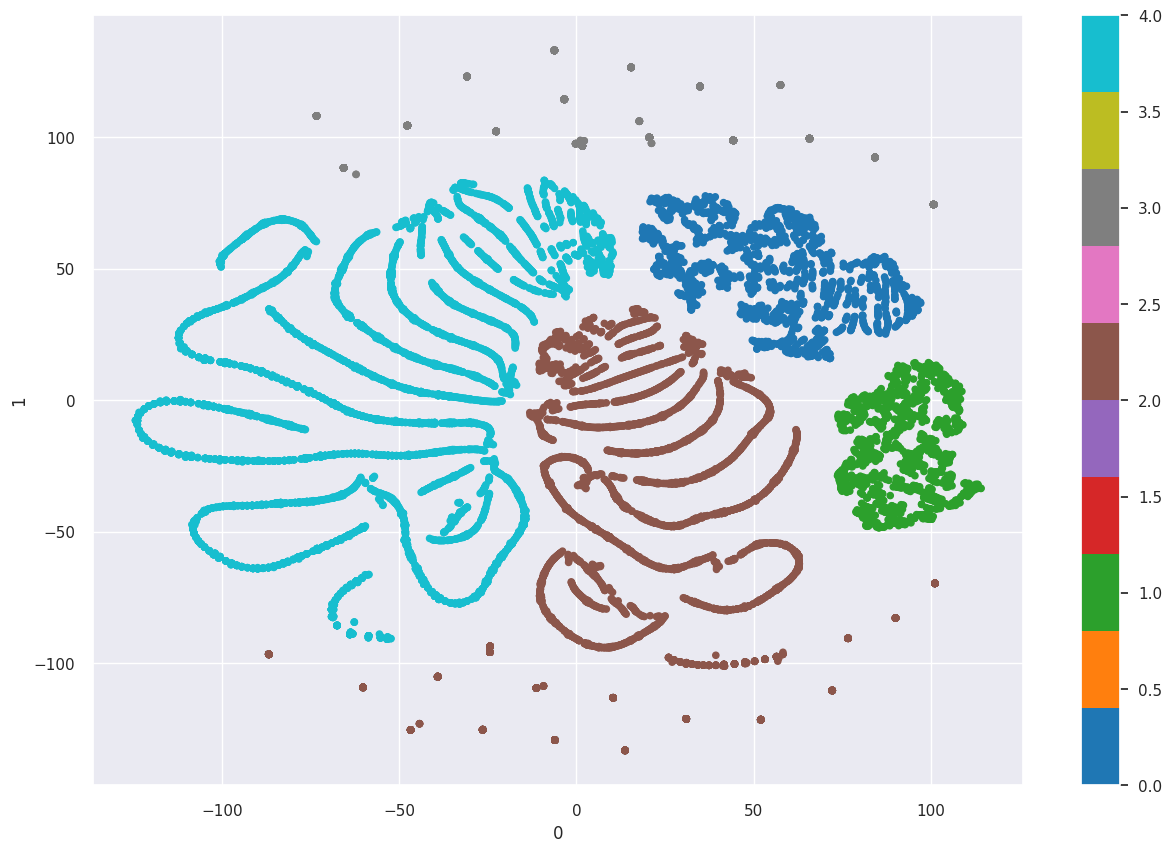

In [123]:
# This is step can be quite time consuming
two_dim_def = TSNE(random_state=42).fit_transform(df_def)

# t-SNE visualization
pd.DataFrame(two_dim_def).plot.scatter(x=0, y=1, c=df_def['Cluster_Label'], colormap='tab10', figsize=(15,10))
plt.show()

#### Engagement

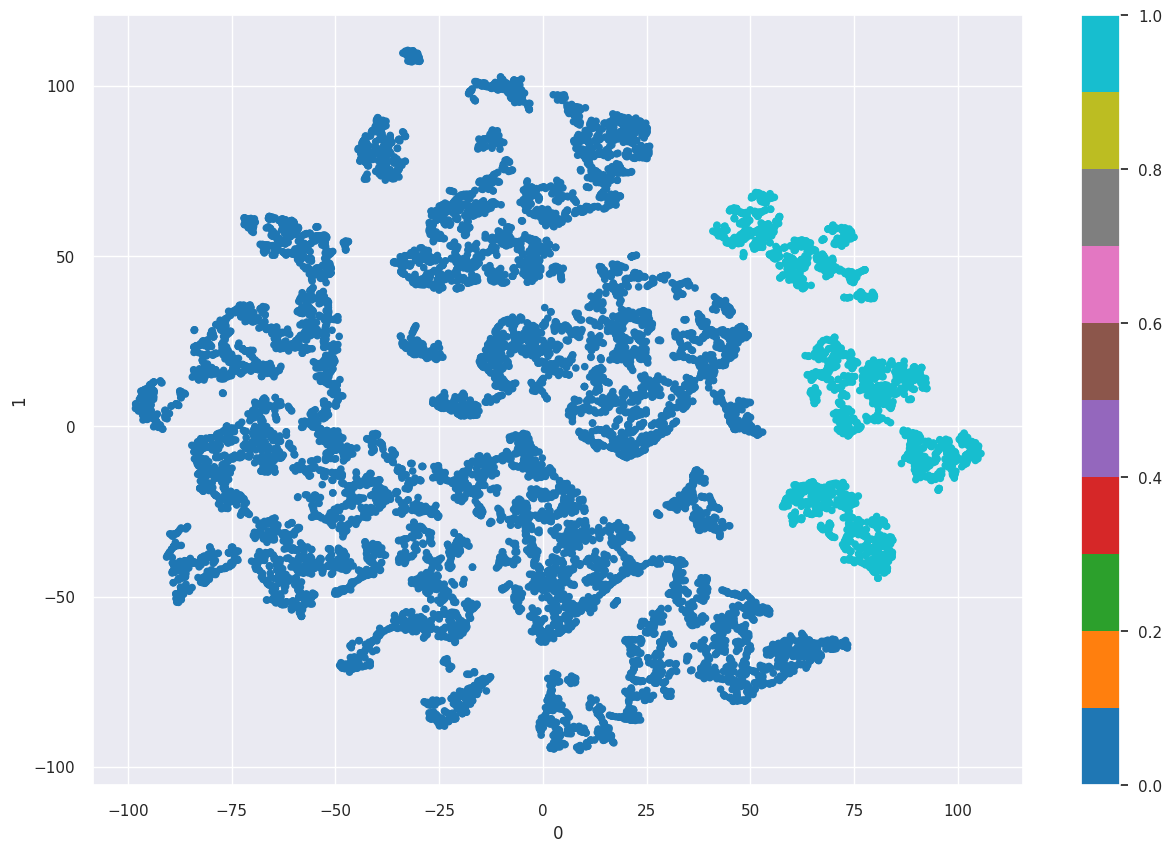

In [124]:
# This is step can be quite time consuming
two_dim_eaf = TSNE(random_state=42).fit_transform(df_eaf)

# t-SNE visualization
pd.DataFrame(two_dim_eaf).plot.scatter(x=0, y=1, c=df_eaf['Cluster_Label'], colormap='tab10', figsize=(15,10))
plt.show()

## Cluster visualization (Decision Tree)

In [125]:
# Preparing the data
X = df.drop(columns=['engagement_labels','demographic_labels'])
y = df.demographic_labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 97.21% of the customers correctly


In [126]:
# Assessing feature importance
pd.Series(dt.feature_importances_, index=X_train.columns)
# Predicting the cluster labels of the outliers
df['df.demographic_labels'] = dt.predict
df.head()

,Gender,Age,Income,DaysWithoutFrequency,LifetimeValue,NumberOfFrequencies,AttendedClasses,RealNumberOfVisits,EnrollmentDuration,LastPeriodDuration,TimeSinceLastVisit,PCA_Activity_0,PCA_Activity_1,PCA_Activity_2,demographic_labels,engagement_labels,df.demographic_labels
ID,,,,,,,,,,,,,,,,,
10000,1,0.689655,0.505051,0.001786,0.037640,0.025078,0.028340,0.037736,0.030446,0.008197,0.000514,0.000000e+00,0.299345,0.456475,0,0,<bound method BaseDecisionTree.predict of Deci...
10001,1,0.333333,0.241506,0.107143,0.201870,0.068966,0.004049,0.018868,0.208924,0.502732,0.805755,5.050034e-01,0.534317,0.628408,4,0,<bound method BaseDecisionTree.predict of Deci...
10002,0,0.264368,0.181818,0.012500,0.015840,0.015674,0.000000,0.113208,0.015748,0.000000,0.456835,8.881784e-16,0.299345,0.456475,2,0,<bound method BaseDecisionTree.predict of Deci...
10003,0,0.103448,0.000000,0.039286,0.065465,0.059561,0.008097,0.056604,0.083990,0.502732,0.145427,5.352889e-01,0.606287,0.939864,2,0,<bound method BaseDecisionTree.predict of Deci...
10004,0,0.402299,0.396694,0.375000,0.157216,0.125392,0.000000,0.000000,0.408399,0.000000,0.370504,7.216450e-16,0.299345,0.456475,1,0,<bound method BaseDecisionTree.predict of Deci...


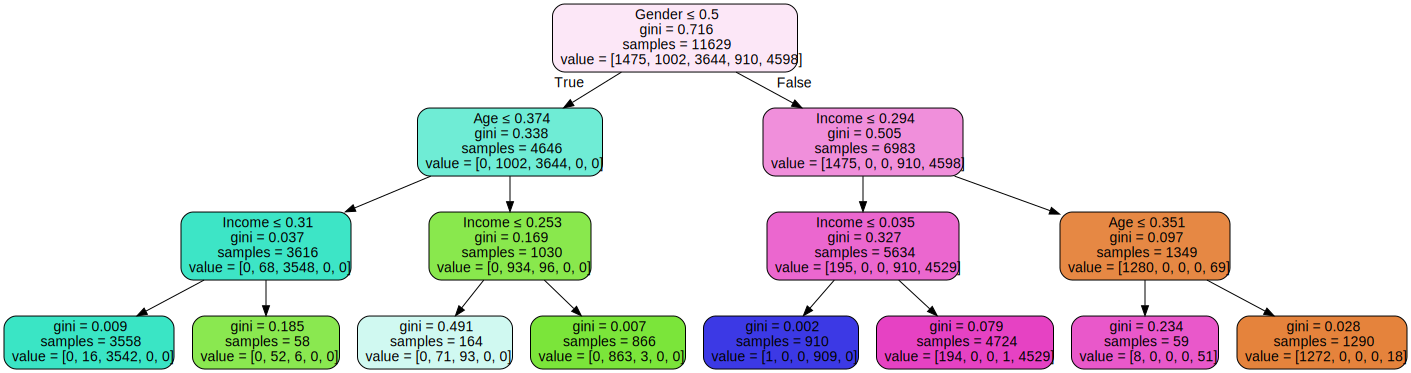

In [127]:
# Visualizing the decision tree
dot_data = export_graphviz(dt, out_file=None,
                           feature_names=X.columns.to_list(),
                           filled=True,
                           rounded=True,
                           special_characters=True)
g = graphviz.Source(dot_data)
g

Notes:
 - The decision tree here visualized is an **excelent tool for interpretability of our business case**, being a valid way of predicting possible dropout customers with the surveillance of their features.
 - We can see that some of the deciding factors for customer loyalty, besides **Gender**, are **TimeSinceLastVisit, NumberOfFrequencies and Age**.
 - All these features should be taken account for marketing approaches for customer retention.